#**Proteome retrieval**

##**GenBank (GBK format) retrieval**

In [ ]:
!pip install biopython
!apt-get update
!apt-get install ncbi-blast+

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.9 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,375 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois

In [ ]:
import pandas as pd

IPG = pd.read_csv('IPG_results_FILTERED.csv')
IPG.loc[len(IPG)] = [000000, "UniProtKB", "GG666582.1", 881066, 881362, "+", "C3Z4X6", "Uncharacterized protein", "Branchiostoma floridae", None, None, 332]

genomeid_list = IPG["Nucleotide Accession"].to_list()
genomeid_list.append("GG666582.1")
print(genomeid_list)
len(IPG)

,Id,Source,Nucleotide Accession,Start,Stop,Strand,Protein,Protein Name,Organism,Strain,Assembly,len
0,799678,RefSeq,NC_001734.1,7850,10021,-,NP_044190.1,hypothetical protein,Canine mastadenovirus A,NaN,GCF_000845925.1,2172
1,718888242,INSDC,OR544955.1,69794,71134,+,WPK28981.1,DNA end protector protein,Escherichia phage vB_EcoP_EP32B,NaN,GCA_033967435.1,1341
2,27156601,INSDC,JN880452.1,8420,13603,-,AFD22004.1,pre-terminal protein,Simian adenovirus A1285,A1285,GCA_006446335.1,5184
3,149490929,RefSeq,NZ_CP083093.1,12817,13557,-,WP_087972990.1,hypothetical protein,Bacillus thuringiensis,B401,GCF_020809125.1,741
4,108190427,RefSeq,NZ_JBDGIA010000015.1,1677,2480,+,WP_063336313.1,hypothetical protein,Bacillus inaquosorum,gbc_l,GCF_040784945.1,804
...,...,...,...,...,...,...,...,...,...,...,...,...
2132,321606571,INSDC,LR796879.1,27352,28899,-,CAB4171957.1,Pectate lyase superfamily protein,uncultured Caudovirales phage,NaN,GCA_902990395.1,1548
2133,6134858,RefSeq,NC_081406.1,162138635,162141632,+,XP_057831880.2,NaN,Cryptomeria japonica,NaN,GCF_030272615.1,2998
2134,303407851,RefSeq,NC_049509.1,2963,4510,+,YP_009889342.1,hypothetical protein,Salmonella phage P46FS4,Salmonella sp.,GCF_011067595.1,1548
2135,44799567,RefSeq,NC_022774.1,24934,26487,+,YP_008771948.1,minor tail protein,Bacillus phage Slash,NaN,GCF_000913795.1,1554


In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = "juancarlos.ramirezm@estudiante.uam.es"

# Function to fetch and save contig sequences from GenBank
def fetch_sequence_and_save(accession):
    if accession:
        print(f"Fetching {accession}")
        try:
            with Entrez.efetch(db="nuccore", id=accession, rettype="gb", retmode="xml") as handle:
                record = SeqIO.read(handle, "gb")
                # Save the record to a GenBank file named after the accession
                with open(f"{accession}.gbk", "w") as gbk_out:
                    SeqIO.write(record, gbk_out, "genbank")
                print(f"Successfully retrieved and saved: {accession}")
        except Exception as e:
            print(f"Error fetching {accession}: {e}")
            print("No GenBank file available")
            with open("GENOME_ERRORS.txt", "a") as error_file:
                error_file.write(f"{accession}\n")

# Iterate over each Genome ID and fetch the corresponding sequence

for genomeid in genomeid_list:
    fetch_sequence_and_save(genomeid)

Fetching NZ_CP053660.1
Error fetching NZ_CP053660.1: GenBank files must be opened in text mode.
No GenBank file available


In [ ]:
# FOR LARGE GENOMES


from Bio import Entrez, SeqIO

Entrez.email = "juancarlos.ramirezm@estudiante.uam.es"

# Function to fetch and save contig sequences from GenBank using 'gbwithparts'
def fetch_sequence_and_save(accession):
    if accession:
        print(f"Fetching {accession}")
        try:
            with Entrez.efetch(db="nuccore", id=accession, rettype="gbwithparts", retmode="text") as handle:
                # Use SeqIO.parse in case the record comes as multiple parts
                records = list(SeqIO.parse(handle, "genbank"))
                if not records:
                    raise ValueError("No records found")
                record = records[0]

                # Save the record to a GenBank file named after the accession
                with open(f"{accession}.gbk", "w") as gbk_out:
                    SeqIO.write(record, gbk_out, "genbank")
                print(f"Successfully retrieved and saved: {accession}")
                return record
        except Exception as e:
            print(f"Error fetching {accession}: {e}")
            print("No GenBank file available")
            with open("GENOME_ERRORS.txt", "a") as error_file:
                error_file.write(f"{accession}\n")
            return None

# Iterate over each GenomeID and fetch the corresponding sequence
for genomeid in genomeid_list:
    fetch_sequence_and_save(genomeid)


Fetching NC_001734.1
Successfully retrieved and saved: NC_001734.1
Fetching OR544955.1
Successfully retrieved and saved: OR544955.1
Fetching JN880452.1
Successfully retrieved and saved: JN880452.1
Fetching NZ_CP083093.1
Successfully retrieved and saved: NZ_CP083093.1
Fetching NZ_JBDGIA010000015.1
Successfully retrieved and saved: NZ_JBDGIA010000015.1
Fetching JAOKRE010000001.1
Successfully retrieved and saved: JAOKRE010000001.1
Fetching OR666137.1
Successfully retrieved and saved: OR666137.1
Fetching MN038175.1
Successfully retrieved and saved: MN038175.1
Fetching NZ_LHZM01000090.1
Successfully retrieved and saved: NZ_LHZM01000090.1
Fetching OR096706.1
Successfully retrieved and saved: OR096706.1
Fetching KM096544.1
Successfully retrieved and saved: KM096544.1
Fetching KP279746.1
Successfully retrieved and saved: KP279746.1
Fetching OP073754.1
Successfully retrieved and saved: OP073754.1
Fetching BK038159.1
Successfully retrieved and saved: BK038159.1
Fetching DATCQX010001001.1
Success

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR532465, SRR532472, SRR532477, SRR532482, SRR532817, SRR532834, SRR533491, SRR533494, SRR533502, SRR533526, SRR537977, SRR537991, SRR539644, SRR540578, SRR540761, SRR540782, SRR545558, SRR545571, SRR545572, SRR545576, SRR545586, SRR569355, SRR569368, SRR569374, SRR638851, SRR638883, SRR640375, SRR640418, SRR640453, SRR650043' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK039347.1
Fetching NC_002649.1
Successfully retrieved and saved: NC_002649.1
Fetching JAUZPD010000006.1
Successfully retrieved and saved: JAUZPD010000006.1
Fetching RHCO01000108.1
Successfully retrieved and saved: RHCO01000108.1
Fetching MK962753.1
Successfully retrieved and saved: MK962753.1
Fetching NC_024486.1
Successfully retrieved and saved: NC_024486.1
Fetching JAYZLZ010000173.1
Successfully retrieved and saved: JAYZLZ010000173.1
Fetching NZ_RMVE01000006.1
Successfully retrieved and saved: NZ_RMVE01000006.1
Fetching JAFRDD010000167.1
Successfully retrieved and saved: JAFRDD010000167.1
Fetching NC_055917.2
Successfully retrieved and saved: NC_055917.2
Fetching NC_075453.1
Successfully retrieved and saved: NC_075453.1
Fetching JBEAXF010000266.1
Successfully retrieved and saved: JBEAXF010000266.1
Fetching BK037072.1
Successfully retrieved and saved: BK037072.1
Fetching JAGCBE010000172.1
Successfully retrieved and saved: JAGCBE010000172.1
Fetching J

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR531965, SRR531984, SRR531990, SRR531995, SRR532527, SRR532529, SRR532967, SRR532981, SRR537794, SRR539463, SRR539485, SRR539808, SRR539822, SRR539983, SRR539989, SRR540002, SRR540014, SRR541297, SRR541299, SRR541301, SRR541313, SRR545522, SRR545538, SRR545541, SRR638841, SRR640352, SRR640383, SRR640541, SRR640558, SRR648651' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK038524.1
Fetching NC_055841.1
Successfully retrieved and saved: NC_055841.1
Fetching PBKW01000001.1
Successfully retrieved and saved: PBKW01000001.1
Fetching JAGCJE010000095.1
Successfully retrieved and saved: JAGCJE010000095.1
Fetching JBAXKL010000202.1
Successfully retrieved and saved: JBAXKL010000202.1
Fetching JAFWCC010000082.1
Successfully retrieved and saved: JAFWCC010000082.1
Fetching RGCK01000636.1
Successfully retrieved and saved: RGCK01000636.1
Fetching RHBH01000012.1
Successfully retrieved and saved: RHBH01000012.1
Fetching RGCK01000002.1
Successfully retrieved and saved: RGCK01000002.1
Fetching JAQYOZ010000056.1
Successfully retrieved and saved: JAQYOZ010000056.1
Fetching NC_000942.1
Successfully retrieved and saved: NC_000942.1
Fetching DASSUK010000381.1
Successfully retrieved and saved: DASSUK010000381.1
Fetching NC_020487.1
Successfully retrieved and saved: NC_020487.1
Fetching JAUZOU010000243.1
Successfully retrieved and saved: JAUZOU

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR15186924, SRR15186925, SRR15186926, SRR15186927, SRR15186928, SRR15186929, SRR15186930, SRR15186931, SRR15186932, SRR15186933, SRR15186934, SRR15186935, SRR15186936, SRR15186937, SRR15186938, SRR15186939, SRR15186940, SRR15186941, SRR15186942, SRR15186943, SRR15186944, SRR15186945, SRR15186946, SRR15186947, SRR15186948, SRR15186950, SRR15186952, SRR15186953, SRR15186954, SRR15186955, SRR15186956, SRR15186957, SRR15186958, SRR15186959, SRR15186960, SRR15186961, SRR15186962, SRR15186963, SRR15186964, SRR15186965, SRR15186966, SRR15186968, SRR15186969, SRR15186970, SRR15186971, SRR15186972, SRR15186973, SRR15186974, SRR15186975, SRR15186976, SRR15186977, SRR15186978, SRR15186979, SRR15186980, SRR15186981, SRR15186984, SRR15186985, SRR15186986, SRR15186987, SRR15186988, SRR15186989, SRR15186990, SRR15186991, SRR15186992, SRR15186993, SRR15186994, SRR15186995, SRR1518699

Successfully retrieved and saved: MZ603080.1
Fetching JAKDRT010000259.1
Successfully retrieved and saved: JAKDRT010000259.1
Fetching OQ504984.1
Successfully retrieved and saved: OQ504984.1
Fetching BK055710.1
Successfully retrieved and saved: BK055710.1
Fetching JAGCAQ010000165.1
Successfully retrieved and saved: JAGCAQ010000165.1
Fetching NC_009989.1
Successfully retrieved and saved: NC_009989.1
Fetching JAXJXA010000214.1
Successfully retrieved and saved: JAXJXA010000214.1
Fetching NZ_LYXZ01000063.1
Successfully retrieved and saved: NZ_LYXZ01000063.1
Fetching BK055865.1
Successfully retrieved and saved: BK055865.1
Fetching JAVWKU010000400.1
Successfully retrieved and saved: JAVWKU010000400.1
Fetching NC_030948.1
Successfully retrieved and saved: NC_030948.1
Fetching BK045733.1
Successfully retrieved and saved: BK045733.1
Fetching BK017338.1
Successfully retrieved and saved: BK017338.1
Fetching NZ_CASZTE010000062.1
Successfully retrieved and saved: NZ_CASZTE010000062.1
Fetching BK02954

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR1031065, SRR1031130, SRR1031175, SRR1031513, SRR1031566, SRR1031591, SRR1031599, SRR1031881' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK047473.1
Fetching NZ_CAQHYD010000051.1
Successfully retrieved and saved: NZ_CAQHYD010000051.1
Fetching NC_073479.1
Successfully retrieved and saved: NC_073479.1
Fetching PQ114753.1
Successfully retrieved and saved: PQ114753.1
Fetching BK057953.1
Successfully retrieved and saved: BK057953.1
Fetching DASRMM010000001.1
Successfully retrieved and saved: DASRMM010000001.1
Fetching NZ_JABTBM010000001.1
Successfully retrieved and saved: NZ_JABTBM010000001.1
Fetching JAFWHK010000015.1
Successfully retrieved and saved: JAFWHK010000015.1
Fetching BK020061.1
Successfully retrieved and saved: BK020061.1
Fetching BK015897.1


/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR1564246, SRR1564248, SRR1564258, SRR1564358, SRR1564365, SRR1568849, SRR1568884, SRR1569220, SRR1569288, SRR1569378, SRR1571123, SRR1571213' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK015897.1
Fetching JAFWWV010000134.1
Successfully retrieved and saved: JAFWWV010000134.1
Fetching BK037364.1
Successfully retrieved and saved: BK037364.1
Fetching OP073953.1
Successfully retrieved and saved: OP073953.1
Fetching BK057890.1
Successfully retrieved and saved: BK057890.1
Fetching ON381767.1
Successfully retrieved and saved: ON381767.1
Fetching NC_019521.1
Successfully retrieved and saved: NC_019521.1
Fetching JAUZPX010000090.1
Successfully retrieved and saved: JAUZPX010000090.1
Fetching JAGCAQ010000350.1
Successfully retrieved and saved: JAGCAQ010000350.1
Fetching NZ_NVES01000051.1
Successfully retrieved and saved: NZ_NVES01000051.1
Fetching JAAWLJ010000181.1
Successfully retrieved and saved: JAAWLJ010000181.1
Fetching NC_073476.1
Successfully retrieved and saved: NC_073476.1
Fetching NC_015250.1
Successfully retrieved and saved: NC_015250.1
Fetching NZ_JAGGQV010000015.1
Successfully retrieved and saved: NZ_JAGGQV010000015.1
Fetching JAFZO

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR532331, SRR532343, SRR532347, SRR532535, SRR532540, SRR532553, SRR533290, SRR533307, SRR533323, SRR533747, SRR533751, SRR533760, SRR537850, SRR538088, SRR538096, SRR538127, SRR538174, SRR539567, SRR539584, SRR539587, SRR539589, SRR539594, SRR540672, SRR540695, SRR540702, SRR545262, SRR545263, SRR545275, SRR545280, SRR545284, SRR545293, SRR545296, SRR549423, SRR549430, SRR549442, SRR549598, SRR549614, SRR549622' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK040195.1
Fetching BK045800.1
Successfully retrieved and saved: BK045800.1
Fetching JAGCYM010000072.1
Successfully retrieved and saved: JAGCYM010000072.1
Fetching NZ_RCTG01000096.1
Successfully retrieved and saved: NZ_RCTG01000096.1
Fetching BK046423.1
Successfully retrieved and saved: BK046423.1
Fetching BK055226.1
Successfully retrieved and saved: BK055226.1
Fetching JAGWLI010000132.1
Successfully retrieved and saved: JAGWLI010000132.1
Fetching NZ_CALBFO010000045.1
Successfully retrieved and saved: NZ_CALBFO010000045.1
Fetching NZ_CAQNSG010000079.1
Successfully retrieved and saved: NZ_CAQNSG010000079.1
Fetching JAGBYG010000070.1
Successfully retrieved and saved: JAGBYG010000070.1
Fetching PP870179.1
Successfully retrieved and saved: PP870179.1
Fetching JAFPAN010000129.1
Successfully retrieved and saved: JAFPAN010000129.1
Fetching BK032006.1
Successfully retrieved and saved: BK032006.1
Fetching BK031586.1
Successfully retrieved and saved: BK031586.1


/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR038746, SRR042027, SRR042181, SRR042184, SRR061111, SRR061112, SRR061113, SRR061114, SRR061129, SRR061134' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK053918.1
Fetching BK018185.1
Successfully retrieved and saved: BK018185.1
Fetching BK052025.1


/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR1031098, SRR1031177, SRR1031183, SRR1031254, SRR1031270, SRR1031286, SRR1031761, SRR1031934' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK052025.1
Fetching JAFPFX010000006.1
Successfully retrieved and saved: JAFPFX010000006.1
Fetching BK020549.1
Successfully retrieved and saved: BK020549.1
Fetching BK035515.1
Successfully retrieved and saved: BK035515.1
Fetching JAGBUI010000333.1
Successfully retrieved and saved: JAGBUI010000333.1
Fetching BK043980.1
Successfully retrieved and saved: BK043980.1
Fetching JAFYIP010000093.1
Successfully retrieved and saved: JAFYIP010000093.1
Fetching BK024652.1
Successfully retrieved and saved: BK024652.1
Fetching OP074244.1
Successfully retrieved and saved: OP074244.1
Fetching JALFXO010000092.1
Successfully retrieved and saved: JALFXO010000092.1
Fetching OP074819.1
Successfully retrieved and saved: OP074819.1
Fetching NC_073477.1
Successfully retrieved and saved: NC_073477.1
Fetching BK018285.1
Successfully retrieved and saved: BK018285.1
Fetching BK058170.1
Successfully retrieved and saved: BK058170.1
Fetching BK047707.1
Successfully retrieved and saved

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR1217367, SRR1217459, SRR1217564, SRR1217566' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: DQPR01000081.1
Fetching LR796734.1
Successfully retrieved and saved: LR796734.1
Fetching RHBQ01000476.1
Successfully retrieved and saved: RHBQ01000476.1
Fetching ON304002.1
Successfully retrieved and saved: ON304002.1
Fetching JAYNMW010000151.1
Successfully retrieved and saved: JAYNMW010000151.1
Fetching CP070695.1
Successfully retrieved and saved: CP070695.1
Fetching NZAU01000107.1
Successfully retrieved and saved: NZAU01000107.1
Fetching JABSRW010000714.1
Successfully retrieved and saved: JABSRW010000714.1
Fetching MK016663.1
Successfully retrieved and saved: MK016663.1
Fetching NC_048049.1
Successfully retrieved and saved: NC_048049.1
Fetching JABHQE010000318.1
Successfully retrieved and saved: JABHQE010000318.1
Fetching PBLU01000011.1
Successfully retrieved and saved: PBLU01000011.1
Fetching JAACRV010000003.1
Successfully retrieved and saved: JAACRV010000003.1
Fetching NZAB01000135.1
Successfully retrieved and saved: NZAB01000135.1
Fetching RFSS010

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: ERR479452, ERR479453, ERR479454, ERR479455, ERR480948, ERR480949, ERR480950, ERR480951' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: NZ_CABVDY010000072.1
Fetching BK051570.1
Successfully retrieved and saved: BK051570.1
Fetching NZ_AKKB01000094.1
Successfully retrieved and saved: NZ_AKKB01000094.1
Fetching BK051648.1
Successfully retrieved and saved: BK051648.1
Fetching JAYNJB010000027.1
Successfully retrieved and saved: JAYNJB010000027.1
Fetching BK029952.1
Successfully retrieved and saved: BK029952.1
Fetching JAFONU010000182.1
Successfully retrieved and saved: JAFONU010000182.1
Fetching JAQWED010000281.1
Successfully retrieved and saved: JAQWED010000281.1
Fetching BK047030.1
Successfully retrieved and saved: BK047030.1
Fetching BK039483.1
Successfully retrieved and saved: BK039483.1
Fetching BK047563.1
Successfully retrieved and saved: BK047563.1
Fetching RGKA01000088.1
Successfully retrieved and saved: RGKA01000088.1
Fetching BK019891.1
Successfully retrieved and saved: BK019891.1
Fetching JAPJNE010000272.1
Successfully retrieved and saved: JAPJNE010000272.1
Fetching JASMFQ0100002

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR1073816, SRR1145956, SRR1159102, SRR1159306, SRR1159973, SRR1160145, SRR1161325, SRR954459' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK052355.1
Fetching NZ_QTJU01000008.1
Successfully retrieved and saved: NZ_QTJU01000008.1
Fetching JAFGRS010000692.1
Successfully retrieved and saved: JAFGRS010000692.1
Fetching NW_020194667.1
Successfully retrieved and saved: NW_020194667.1
Fetching DASXVN010000054.1
Successfully retrieved and saved: DASXVN010000054.1
Fetching NZ_CP036433.1
Successfully retrieved and saved: NZ_CP036433.1
Fetching DATJNL010000546.1
Successfully retrieved and saved: DATJNL010000546.1
Fetching NZ_CP121644.1
Successfully retrieved and saved: NZ_CP121644.1
Fetching JACMLY010000015.1
Successfully retrieved and saved: JACMLY010000015.1
Fetching JAPLCQ010000011.1
Successfully retrieved and saved: JAPLCQ010000011.1
Fetching JBDUAY010000030.1
Successfully retrieved and saved: JBDUAY010000030.1
Fetching DASXUY010000040.1
Successfully retrieved and saved: DASXUY010000040.1
Fetching NZ_JAZGGR010000010.1
Successfully retrieved and saved: NZ_JAZGGR010000010.1
Fetching BK066403.1
Suc

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR3166102, SRR2016847, SRR3166092, SRR2016852' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: JAAYKG010000060.1
Fetching JAFGFK010000364.1
Successfully retrieved and saved: JAFGFK010000364.1
Fetching NZ_JAHNZO010000006.1
Successfully retrieved and saved: NZ_JAHNZO010000006.1
Fetching OM293948.2
Successfully retrieved and saved: OM293948.2
Fetching JABUFB010000008.1
Successfully retrieved and saved: JABUFB010000008.1
Fetching NZ_LWTT01000002.1
Successfully retrieved and saved: NZ_LWTT01000002.1
Fetching NZ_NKDB02000002.1
Successfully retrieved and saved: NZ_NKDB02000002.1
Fetching NZ_JALPRX010000165.1
Successfully retrieved and saved: NZ_JALPRX010000165.1
Fetching NZ_JBHTFF010000005.1
Successfully retrieved and saved: NZ_JBHTFF010000005.1
Fetching NZ_JBGCCN010000003.1
Successfully retrieved and saved: NZ_JBGCCN010000003.1
Fetching SIBC01000102.1
Successfully retrieved and saved: SIBC01000102.1
Fetching WRNM01000144.1
Successfully retrieved and saved: WRNM01000144.1
Fetching NZ_BAAAQY010000017.1
Successfully retrieved and saved: NZ_BAAAQY01000001

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR532065, SRR532066, SRR532067, SRR532080, SRR532374, SRR532674, SRR532684, SRR532685, SRR533123, SRR533871, SRR533873, SRR537739, SRR537775, SRR538087, SRR538097, SRR538217, SRR539834, SRR539850, SRR539857, SRR541007, SRR541010, SRR541014, SRR541021, SRR541026, SRR541034, SRR541226, SRR541234, SRR541245, SRR541251, SRR541255, SRR545611, SRR545612, SRR549714, SRR549719, SRR549730, SRR549733, SRR549747, SRR549748' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK042305.1
Fetching JACNFJ010001524.1
Successfully retrieved and saved: JACNFJ010001524.1
Fetching JAZADQ010000048.1
Successfully retrieved and saved: JAZADQ010000048.1
Fetching BK041697.1
Successfully retrieved and saved: BK041697.1
Fetching JAIPIO010000183.1
Successfully retrieved and saved: JAIPIO010000183.1
Fetching JAIPJC010000134.1
Successfully retrieved and saved: JAIPJC010000134.1
Fetching NZ_CP010904.1
Successfully retrieved and saved: NZ_CP010904.1
Fetching NZ_JAZGGR010000010.1
Successfully retrieved and saved: NZ_JAZGGR010000010.1
Fetching NZ_JBIUBV010000008.1
Successfully retrieved and saved: NZ_JBIUBV010000008.1
Fetching NZ_JRKJ01000002.1
Successfully retrieved and saved: NZ_JRKJ01000002.1
Fetching DAOLBH010000694.1
Successfully retrieved and saved: DAOLBH010000694.1
Fetching JAGPGE010000233.1
Successfully retrieved and saved: JAGPGE010000233.1
Fetching JADLHF010000091.1
Successfully retrieved and saved: JADLHF010000091.1
Fetching JAGBXP01

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR8482191, SRR8482192, SRR8482193, SRR8482194, SRR8482195, SRR8482196, SRR8482197, SRR8482198' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: MK500328.1
Fetching NC_021330.1
Successfully retrieved and saved: NC_021330.1
Fetching DRBS01000193.1
Successfully retrieved and saved: DRBS01000193.1
Fetching OU895880.1
Successfully retrieved and saved: OU895880.1
Fetching MT310898.1
Successfully retrieved and saved: MT310898.1
Fetching AY822469.1
Successfully retrieved and saved: AY822469.1
Fetching NC_027626.1
Successfully retrieved and saved: NC_027626.1
Fetching BK040862.1
Successfully retrieved and saved: BK040862.1
Fetching DNBZ01000268.1
Successfully retrieved and saved: DNBZ01000268.1
Fetching MK892697.1
Successfully retrieved and saved: MK892697.1
Fetching NZ_CP009574.1
Successfully retrieved and saved: NZ_CP009574.1
Fetching BFAA01021776.1


/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: DRR111848, DRR111849, DRR111850, DRR111851, DRR111852, DRR111853, DRR111854, DRR111855, DRR111856, DRR111857, DRR111858, DRR111859, DRR111860, DRR111861, DRR111862, DRR111863, DRR111864, DRR111865, DRR111866, DRR111867, DRR111868, DRR111869, DRR111870, DRR111871' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BFAA01021776.1
Fetching NZ_AYYH01000084.1
Successfully retrieved and saved: NZ_AYYH01000084.1
Fetching NZ_CP017015.1
Successfully retrieved and saved: NZ_CP017015.1
Fetching DNHK01000407.1
Successfully retrieved and saved: DNHK01000407.1
Fetching DRHV01000214.1
Successfully retrieved and saved: DRHV01000214.1
Fetching NC_006953.1
Successfully retrieved and saved: NC_006953.1
Fetching MH517022.1
Successfully retrieved and saved: MH517022.1
Fetching LR797474.1
Successfully retrieved and saved: LR797474.1
Fetching NZRF01000269.1
Successfully retrieved and saved: NZRF01000269.1
Fetching KY296500.1
Successfully retrieved and saved: KY296500.1
Fetching RXGA01000003.1
Successfully retrieved and saved: RXGA01000003.1
Fetching NZ_PYGI01000019.1
Successfully retrieved and saved: NZ_PYGI01000019.1
Fetching MK994522.1
Successfully retrieved and saved: MK994522.1
Fetching QMYQ01000510.1
Successfully retrieved and saved: QMYQ01000510.1
Fetching MH552495.1
Successful

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: ERR1527239, ERR1527240, ERR1527241, ERR1527242, ERR1527243, ERR1527244, ERR1527245, ERR1527246, ERR1527247, ERR1527248, ERR1527249, ERR1527250, ERR1527251, ERR1527252, ERR1527253, ERR1527254, ERR1527255, ERR1527256, ERR1527257, ERR1527258, ERR1527259, ERR1527260, ERR1527261, ERR1527262, ERR1527263, ERR1527264, ERR1527265, ERR1527266, ERR1527267, ERR1527268, ERR1527269, ERR1527270, ERR1527271, ERR1527272, ERR1527273, ERR1527274, ERR1527275, ERR1527276, ERR1527277, ERR1527278, ERR1527279, ERR1527280, ERR1527281, ERR1527282, ERR1527283, ERR1527284, ERR1527285, ERR1527286' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: CABMGC010000032.1
Fetching MK387337.2
Successfully retrieved and saved: MK387337.2
Fetching PBIO01000029.1
Successfully retrieved and saved: PBIO01000029.1
Fetching BK013345.1
Successfully retrieved and saved: BK013345.1
Fetching DMHR01001323.1
Successfully retrieved and saved: DMHR01001323.1
Fetching LR798243.1
Successfully retrieved and saved: LR798243.1
Fetching DMCA01000255.1
Successfully retrieved and saved: DMCA01000255.1
Fetching DOFH01000146.1
Successfully retrieved and saved: DOFH01000146.1
Fetching LSSB01000084.1
Successfully retrieved and saved: LSSB01000084.1
Fetching NZ_FPAT01000007.1
Successfully retrieved and saved: NZ_FPAT01000007.1
Fetching DOWI01000115.1
Successfully retrieved and saved: DOWI01000115.1
Fetching LJNR01000435.1
Successfully retrieved and saved: LJNR01000435.1
Fetching MAXR01000078.1
Successfully retrieved and saved: MAXR01000078.1
Fetching NZLH01000017.1
Successfully retrieved and saved: NZLH01000017.1
Fetching RFLS0100

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR3184552, SRR3184553, SRR3184554, SRR3184648, SRR3184649, SRR3184675, SRR3184676, SRR3184677' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: JAAZMA010000200.1
Fetching NZ_CAAAIB010000015.1
Successfully retrieved and saved: NZ_CAAAIB010000015.1
Fetching MW030556.1


/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR12347139, SRR12347143, SRR12347135, SRR12347132, SRR12347145, SRR12347144, SRR12347142, SRR12347141, SRR12347140, SRR12347138, SRR12347137, SRR12347136, SRR12347134, SRR12347133, SRR12347146' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: MW030556.1
Fetching MH617458.1
Successfully retrieved and saved: MH617458.1
Fetching PFLU01000039.1
Successfully retrieved and saved: PFLU01000039.1
Fetching NZ_JAESDL010000020.1
Successfully retrieved and saved: NZ_JAESDL010000020.1
Fetching WTFG01000004.1
Successfully retrieved and saved: WTFG01000004.1
Fetching LR796245.1
Successfully retrieved and saved: LR796245.1
Fetching NZ_FQWY01000029.1
Successfully retrieved and saved: NZ_FQWY01000029.1
Fetching NZ_FQYI01000004.1
Successfully retrieved and saved: NZ_FQYI01000004.1
Fetching MT364305.1
Successfully retrieved and saved: MT364305.1
Fetching NC_011026.1
Successfully retrieved and saved: NC_011026.1
Fetching JAWCMK010000335.1
Successfully retrieved and saved: JAWCMK010000335.1
Fetching JAAZHZ010000603.1


/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR5079467, SRR5079466, SRR5079463, SRR5079464' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: JAAZHZ010000603.1
Fetching JAMWCT010000154.1
Successfully retrieved and saved: JAMWCT010000154.1
Fetching NZ_PSYY01000023.1
Successfully retrieved and saved: NZ_PSYY01000023.1
Fetching LR796715.1
Successfully retrieved and saved: LR796715.1
Fetching LSSC01000050.1
Successfully retrieved and saved: LSSC01000050.1
Fetching NZ_CP045484.1
Successfully retrieved and saved: NZ_CP045484.1
Fetching NZ_FRAU01000006.1
Successfully retrieved and saved: NZ_FRAU01000006.1
Fetching QNAP01000178.1
Successfully retrieved and saved: QNAP01000178.1
Fetching JACCWO010000698.1
Successfully retrieved and saved: JACCWO010000698.1
Fetching NZ_SEWF01000068.1
Successfully retrieved and saved: NZ_SEWF01000068.1
Fetching SCSM01000046.1
Successfully retrieved and saved: SCSM01000046.1
Fetching JAMWCA010000136.1
Successfully retrieved and saved: JAMWCA010000136.1
Fetching NC_015681.1
Successfully retrieved and saved: NC_015681.1
Fetching NZ_CP034791.1
Successfully retrieved and sa

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR3499599, SRR3499600, SRR3499601, SRR3499602, SRR3499603, SRR3499604, SRR3499605, SRR3499606, SRR3499607' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: JAAYFP010000091.1
Fetching PRFC01000202.1
Successfully retrieved and saved: PRFC01000202.1
Fetching NC_048037.1
Successfully retrieved and saved: NC_048037.1
Fetching QMWM01000040.1
Successfully retrieved and saved: QMWM01000040.1
Fetching JAGCWO010000565.1
Successfully retrieved and saved: JAGCWO010000565.1
Fetching LR797107.1
Successfully retrieved and saved: LR797107.1
Fetching JAOGBL010000005.1
Successfully retrieved and saved: JAOGBL010000005.1
Fetching NZ_JBAZQQ010000013.1
Successfully retrieved and saved: NZ_JBAZQQ010000013.1
Fetching DRFP01000137.1
Successfully retrieved and saved: DRFP01000137.1
Fetching QMZB01000028.1
Successfully retrieved and saved: QMZB01000028.1
Fetching JBAZJX010000323.1
Successfully retrieved and saved: JBAZJX010000323.1
Fetching DSAK01000073.1
Successfully retrieved and saved: DSAK01000073.1
Fetching NZ_CP020477.1
Successfully retrieved and saved: NZ_CP020477.1
Fetching JAVZYH010000010.1
Successfully retrieved and save

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: DRR066655, DRR066656, DRR066657, DRR066658, DRR066659, DRR066660, DRR066661, DRR066662, DRR066663, DRR066664, DRR066665, DRR066666, DRR066667, DRR066668' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: DULK01000020.1
Fetching DTZL01000121.1
Successfully retrieved and saved: DTZL01000121.1
Fetching MK072136.1
Successfully retrieved and saved: MK072136.1
Fetching AWSJ01000245.1
Successfully retrieved and saved: AWSJ01000245.1
Fetching JAAZBH010000688.1
Successfully retrieved and saved: JAAZBH010000688.1
Fetching JASMFQ010000050.1
Successfully retrieved and saved: JASMFQ010000050.1
Fetching NZ_MAMP01000012.1
Successfully retrieved and saved: NZ_MAMP01000012.1
Fetching OP030908.1
Successfully retrieved and saved: OP030908.1
Fetching NZ_CP026498.1
Successfully retrieved and saved: NZ_CP026498.1
Fetching LNDD01000002.1
Successfully retrieved and saved: LNDD01000002.1
Fetching OP272492.1
Successfully retrieved and saved: OP272492.1
Fetching JANWYV010000002.1
Successfully retrieved and saved: JANWYV010000002.1
Fetching QMNP01000212.1
Successfully retrieved and saved: QMNP01000212.1
Fetching NZ_SRSF01000013.1
Successfully retrieved and saved: NZ_SRSF01000013.

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR11032320, SRR11032319, SRR11032318, SRR11032317, SRR11032316, SRR11032315, SRR11032314, SRR11032313, SRR11032312, SRR11032311, SRR11032310, SRR11032309, SRR11032308, SRR11032307' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: JAAZPT010000422.1
Fetching BK016136.1
Successfully retrieved and saved: BK016136.1
Fetching BK014964.1
Successfully retrieved and saved: BK014964.1
Fetching MK892736.1
Successfully retrieved and saved: MK892736.1
Fetching NC_070967.1
Successfully retrieved and saved: NC_070967.1
Fetching QMWC01000219.1
Successfully retrieved and saved: QMWC01000219.1
Fetching NC_048651.1
Successfully retrieved and saved: NC_048651.1
Fetching MW589261.1
Successfully retrieved and saved: MW589261.1
Fetching NC_022521.1
Successfully retrieved and saved: NC_022521.1
Fetching BK015645.1
Successfully retrieved and saved: BK015645.1
Fetching NC_005830.1
Successfully retrieved and saved: NC_005830.1
Fetching NZ_LIIN01000152.1
Successfully retrieved and saved: NZ_LIIN01000152.1
Fetching MN582076.1
Successfully retrieved and saved: MN582076.1
Fetching LR796964.1
Successfully retrieved and saved: LR796964.1
Fetching QMWV01000214.1
Successfully retrieved and saved: QMWV01000214.1


/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: ERR594371, ERR594373, ERR594372, ERR594367, ERR594366' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: MK892636.1
Fetching NZ_RYYR01000002.1
Successfully retrieved and saved: NZ_RYYR01000002.1
Fetching DUHO01000031.1
Successfully retrieved and saved: DUHO01000031.1
Fetching JAWBOW010000031.1
Successfully retrieved and saved: JAWBOW010000031.1
Fetching MH673673.1
Successfully retrieved and saved: MH673673.1
Fetching MN855698.1
Successfully retrieved and saved: MN855698.1
Fetching BK041972.1
Successfully retrieved and saved: BK041972.1
Fetching MK892552.1
Successfully retrieved and saved: MK892552.1
Fetching NC_016163.1
Successfully retrieved and saved: NC_016163.1
Fetching NZQM01000170.1
Successfully retrieved and saved: NZQM01000170.1
Fetching QMSG01000298.1
Successfully retrieved and saved: QMSG01000298.1
Fetching SHMU01000065.1
Successfully retrieved and saved: SHMU01000065.1
Fetching PEZJ01000009.1
Successfully retrieved and saved: PEZJ01000009.1
Fetching MK105819.1
Successfully retrieved and saved: MK105819.1
Fetching MK500609.1
Successfully retriev

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: DRR101361, DRR101362, DRR101363, DRR101364, DRR101365, DRR101366, DRR101367' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BEIQ01000001.1
Fetching PAAX01000010.1
Successfully retrieved and saved: PAAX01000010.1
Fetching NZ_CP073089.1
Successfully retrieved and saved: NZ_CP073089.1
Fetching MK089780.1
Successfully retrieved and saved: MK089780.1
Fetching NC_021337.1
Successfully retrieved and saved: NC_021337.1
Fetching MHMA01000019.1
Successfully retrieved and saved: MHMA01000019.1
Fetching NC_047832.1
Successfully retrieved and saved: NC_047832.1
Fetching NC_019454.1
Successfully retrieved and saved: NC_019454.1
Fetching NC_048767.1
Successfully retrieved and saved: NC_048767.1
Fetching NC_055784.1
Successfully retrieved and saved: NC_055784.1
Fetching NZ_MDBX01000057.1
Successfully retrieved and saved: NZ_MDBX01000057.1
Fetching NZ_QKYN01000079.1
Successfully retrieved and saved: NZ_QKYN01000079.1
Fetching KX160207.1
Successfully retrieved and saved: KX160207.1
Fetching MT682706.1
Successfully retrieved and saved: MT682706.1
Fetching NC_047772.1
Successfully retrieved an

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR532160, SRR532177, SRR532182, SRR532188, SRR532375, SRR533141, SRR533144, SRR533150, SRR533830, SRR533843, SRR533846, SRR533941, SRR533947, SRR537700, SRR537737, SRR538161, SRR538196, SRR538242, SRR539723, SRR539732, SRR539739, SRR539749, SRR539750, SRR539753, SRR540372, SRR540378, SRR540388, SRR540406, SRR540407, SRR541079, SRR541094, SRR545422, SRR545423, SRR545440, SRR549562, SRR549569, SRR549576, SRR549580' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK016733.1
Fetching NC_023556.1
Successfully retrieved and saved: NC_023556.1
Fetching NZ_JAASTT010000023.1
Successfully retrieved and saved: NZ_JAASTT010000023.1
Fetching BK032718.1
Successfully retrieved and saved: BK032718.1
Fetching NC_028800.1
Successfully retrieved and saved: NC_028800.1
Fetching NC_074969.1
Successfully retrieved and saved: NC_074969.1
Fetching NZ_SCIN01000004.1
Successfully retrieved and saved: NZ_SCIN01000004.1
Fetching BK039300.1
Successfully retrieved and saved: BK039300.1
Fetching DTYR01000083.1
Successfully retrieved and saved: DTYR01000083.1
Fetching VAZZ01000490.1
Successfully retrieved and saved: VAZZ01000490.1
Fetching NC_014637.1
Successfully retrieved and saved: NC_014637.1
Fetching DTSP01000206.1
Successfully retrieved and saved: DTSP01000206.1
Fetching JNSF01000005.1
Successfully retrieved and saved: JNSF01000005.1
Fetching NC_049472.1
Successfully retrieved and saved: NC_049472.1
Fetching MK892645.1
Successfully r

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: ERR3446780, ERR3446781, ERR3446782, ERR3446783, ERR3446784, ERR3446785, ERR3446786, ERR3446787, ERR3446788, ERR3446789, ERR3446790' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: LR743588.1
Fetching NC_029692.1
Successfully retrieved and saved: NC_029692.1
Fetching BK040518.1
Successfully retrieved and saved: BK040518.1
Fetching NW_024468025.1
Successfully retrieved and saved: NW_024468025.1
Fetching LR797306.1
Successfully retrieved and saved: LR797306.1
Fetching NW_019268541.1
Successfully retrieved and saved: NW_019268541.1
Fetching NZ_CACVCH010000047.1
Successfully retrieved and saved: NZ_CACVCH010000047.1
Fetching NC_007346.1
Successfully retrieved and saved: NC_007346.1
Fetching NZ_JACHJW010000001.1
Successfully retrieved and saved: NZ_JACHJW010000001.1
Fetching NZ_JARWOE010000746.1
Successfully retrieved and saved: NZ_JARWOE010000746.1
Fetching LR797817.1
Successfully retrieved and saved: LR797817.1
Fetching NZ_FOLL01000010.1
Successfully retrieved and saved: NZ_FOLL01000010.1
Fetching MK250085.1
Successfully retrieved and saved: MK250085.1
Fetching NZ_JAGYPM010000004.1
Successfully retrieved and saved: NZ_JAGYPM01000000

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: DRR166235, DRR166236, DRR166237, DRR166238, DRR166239, DRR166240, DRR166241, DRR166242, DRR166243, DRR188461, DRR188462' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BKCP01013514.1
Fetching NZ_CP009044.1
Successfully retrieved and saved: NZ_CP009044.1
Fetching MH825712.1
Successfully retrieved and saved: MH825712.1
Fetching JACCZT010000104.1
Successfully retrieved and saved: JACCZT010000104.1
Fetching NZ_AP018712.1
Successfully retrieved and saved: NZ_AP018712.1
Fetching QMTG01000110.1
Successfully retrieved and saved: QMTG01000110.1
Fetching DRJY01000026.1
Successfully retrieved and saved: DRJY01000026.1
Fetching MW712735.1
Successfully retrieved and saved: MW712735.1
Fetching NC_014917.1
Successfully retrieved and saved: NC_014917.1
Fetching BK034520.1
Successfully retrieved and saved: BK034520.1
Fetching NZ_CP016447.1
Successfully retrieved and saved: NZ_CP016447.1
Fetching JABWCH010000477.1
Successfully retrieved and saved: JABWCH010000477.1
Fetching QMMK01000003.1
Successfully retrieved and saved: QMMK01000003.1
Fetching LR796938.1
Successfully retrieved and saved: LR796938.1
Fetching NZ_CP048795.1
Successfull

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: ERR594387, ERR594357, ERR594380, ERR594383, ERR594381' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: MK892607.1
Fetching KT997803.1
Successfully retrieved and saved: KT997803.1
Fetching DTXD01000185.1
Successfully retrieved and saved: DTXD01000185.1
Fetching NZ_JAFNMG010000001.1
Successfully retrieved and saved: NZ_JAFNMG010000001.1
Fetching MDYQ01000013.1
Successfully retrieved and saved: MDYQ01000013.1
Fetching BK040981.1


/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR1031110, SRR1031136, SRR1031163, SRR1031389, SRR1031715, SRR1031828, SRR1031847, SRR1031929' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: BK040981.1
Fetching NVUQ01000034.1
Successfully retrieved and saved: NVUQ01000034.1
Fetching JARO02002344.1
Successfully retrieved and saved: JARO02002344.1
Fetching NZ_FQYI01000008.1
Successfully retrieved and saved: NZ_FQYI01000008.1
Fetching MK875791.1
Successfully retrieved and saved: MK875791.1
Fetching JABWBE010000690.1
Successfully retrieved and saved: JABWBE010000690.1
Fetching NZER01000311.1
Successfully retrieved and saved: NZER01000311.1
Fetching NZ_LT907975.1
Successfully retrieved and saved: NZ_LT907975.1
Fetching JACNFV010000031.1
Successfully retrieved and saved: JACNFV010000031.1
Fetching NZ_VBTZ01000014.1
Successfully retrieved and saved: NZ_VBTZ01000014.1
Fetching MN813685.1
Successfully retrieved and saved: MN813685.1
Fetching MU006075.1
Successfully retrieved and saved: MU006075.1
Fetching BK015140.1
Successfully retrieved and saved: BK015140.1
Fetching MEEM01000006.1
Successfully retrieved and saved: MEEM01000006.1
Fetching MWBZ010

/usr/local/lib/python3.11/dist-packages/Bio/SeqIO/InsdcIO.py:600: BiopythonWarning: Annotation 'Sequence Read Archive: SRR2016713, SRR2016817, SRR2016825, SRR2016839, SRR2016850, SRR2017704, SRR2017705, SRR2017707, SRR2017709, SRR2017730, SRR2017732, SRR2017736, SRR2017916, SRR2017914, SRR2017912, SRR2017910, SRR2017849, SRR2017842, SRR2017846, SRR2017860, SRR2017753, SRR2017752, SRR2017751, SRR2017749, SRR2017739' too long
  warnings.warn(f"Annotation {text!r} too long", BiopythonWarning)


Successfully retrieved and saved: JAAZEO010000418.1
Fetching REEQ01000210.1
Successfully retrieved and saved: REEQ01000210.1
Fetching RPQK01000207.1
Successfully retrieved and saved: RPQK01000207.1
Fetching NC_070650.1
Successfully retrieved and saved: NC_070650.1
Fetching JACDGX010000033.1
Successfully retrieved and saved: JACDGX010000033.1
Fetching CP002278.1
Successfully retrieved and saved: CP002278.1
Fetching LGGF01000003.1
Successfully retrieved and saved: LGGF01000003.1
Fetching MH809530.1
Successfully retrieved and saved: MH809530.1
Fetching LR796648.1
Successfully retrieved and saved: LR796648.1
Fetching NZ_CHTU01000005.1
Successfully retrieved and saved: NZ_CHTU01000005.1
Fetching NZ_AP019779.1
Successfully retrieved and saved: NZ_AP019779.1
Fetching MK774614.2
Successfully retrieved and saved: MK774614.2
Fetching MN908690.1
Successfully retrieved and saved: MN908690.1
Fetching CP007053.1
Successfully retrieved and saved: CP007053.1
Fetching LR797056.1
Successfully retrieved 

In [ ]:
fetch_sequence_and_save("NZ_AP018907.1")

Fetching NZ_AP018907.1
Successfully retrieved and saved: NZ_AP018907.1


In [ ]:
!tar -czvf Representative_Genomes_GenBank.tar.gz *.gbk
!tar -czvf 0000.tar.gz *.gbk
!rm GENOME_ERRORS.txt
!rm 0000.tar.gz


!tar -xvf Representative_Genomes_GenBank.tar.gz
!tar -czvf 0000.tar.gz *.gbk

ABBGAK010000009.1.gbk
ABJPJW010000008.1.gbk
ABXP02000122.1.gbk
ADAD01000082.1.gbk
AJ586898.1.gbk
ALJD01000016.1.gbk
AMFJ01005424.1.gbk
AP013912.1.gbk
AP014200.1.gbk
AP017647.1.gbk
AP019525.1.gbk
ATBP01001652.1.gbk
AUSU01001187.1.gbk
AWSJ01000245.1.gbk
AY822469.1.gbk
AY848684.1.gbk
AZFC01000030.1.gbk
AZRA01000001.1.gbk
BCNO01000002.1.gbk
BDQX01000096.1.gbk
BDSW01000143.1.gbk
BEIQ01000001.1.gbk
BFAA01021776.1.gbk
BGZN01000059.1.gbk
BJFU01000002.1.gbk
BK013345.1.gbk
BK013347.1.gbk
BK014698.1.gbk
BK014751.1.gbk
BK014853.1.gbk
BK014964.1.gbk
BK015140.1.gbk
BK015217.1.gbk
BK015539.1.gbk
BK015645.1.gbk
BK015667.1.gbk
BK015689.1.gbk
BK015897.1.gbk
BK015931.1.gbk
BK015936.1.gbk
BK015993.1.gbk
BK016086.1.gbk
BK016121.1.gbk
BK016125.1.gbk
BK016136.1.gbk
BK016182.1.gbk
BK016274.1.gbk
BK016314.1.gbk
BK016585.1.gbk
BK016733.1.gbk
BK017080.1.gbk
BK017141.1.gbk
BK017257.1.gbk
BK017272.1.gbk
BK017338.1.gbk
BK017887.1.gbk
BK018185.1.gbk
BK018285.1.gbk
BK018336.1.gbk
BK018356.1.gbk
BK018514.1.gbk
BK01868

In [ ]:
import os

missing = []

gbk_files = [f for f in os.listdir() if f.endswith(".gbk")]
file_names = [os.path.splitext(f)[0] for f in gbk_files] # List of extension-less filenames
print(file_names)
print(len(file_names))
print(len(list(set(genomeid_list))))

for filename in genomeid_list:
    if filename not in file_names:
      print(filename)
      missing.append(filename)

['NZ_AZRV01000006.1', 'NZ_RBCJ01000001.1', 'MG592534.1', 'NZAU01000107.1', 'NZ_QZCH01000008.1', 'NC_055063.1', 'OR003940.1', 'QMOB01000019.1', 'JAGCYM010000072.1', 'MK892746.1', 'QMSJ01000175.1', 'PQ114753.1', 'DPQA01000173.1', 'NC_028659.1', 'LR797213.1', 'BK017257.1', 'NZAS01000120.1', 'NZ_VWSH01000001.1', 'NZ_NXLX01000013.1', 'RBMR01000006.1', 'JBAYUE010000068.1', 'NC_073479.1', 'MK892540.1', 'NZ_CP053660.1', 'NZ_CP110622.1', 'NZ_JAAKGT010000009.1', 'JAOJJN010000001.1', 'NC_049383.1', 'MVBO01000035.1', 'MK095605.1', 'QQUL01000309.1', 'BK015931.1', 'JAFWJA010000010.1', 'NC_014917.1', 'NZ_FQXV01000018.1', 'NZ_FXZI01000084.1', 'NZ_DF820500.1', 'DSAK01000073.1', 'NZ_CP102850.1', 'JASGUH010000008.1', 'NZ_AVCY01000001.1', 'NZGJ01000009.1', 'JAGCAQ010000350.1', 'LR797075.1', 'KU886272.1', 'MK892639.1', 'NZ_AYXY01000019.1', 'BK038692.1', 'JAFWCC010000082.1', 'BK059131.1', 'NC_028938.1', 'MG592622.1', 'NZ_FNKQ01000006.1', 'NZ_CP048795.1', 'JAWCPQ010000087.1', 'MK892725.1', 'NCAM01000214.1', 

In [ ]:
import pandas as pd

fields_ipg = ["Id", "Source", "Nucleotide Accession", "Start", "Stop", "Strand", "Protein", "Protein Name", "Organism", "Strain", "Assembly"]
df_ipg = pd.DataFrame(columns = fields_ipg)

with open("IPG_results_2.tsv", "r") as ipg:
  ipg_list = ipg.readlines()

for line in ipg_list:
  line = line.strip()
  if "Source" not in line:
    #print(line)
    line = line.split("\t")
    #print(line)
    #print("\n")
    while len(line) != 11:
      line.append("")
    df_ipg.loc[len(df_ipg.index)] = line

df_ipg

common = pd.DataFrame(columns = fields_ipg)

for entry in range(len(df_ipg)):
  if df_ipg.loc[entry, "Protein"] in ids_list:
    print(df_ipg.loc[entry])
    common.loc[len(common.index)] = df_ipg.loc[entry]

Se han truncado las últimas 5000 líneas del flujo de salida.
Stop                                                               108868
Strand                                                                  -
Protein                                                    WP_154615458.1
Protein Name            nitrous oxide reductase family maturation prot...
Organism                                            Nocardioides marmotae
Strain                                                             zg-578
Assembly                                                  GCF_014493605.1
Name: 3506, dtype: object
Id                                                              281581044
Source                                                             RefSeq
Nucleotide Accession                                    NZ_WLCI01000013.1
Start                                                              242681
Stop                                                               244030
Strand                   

In [ ]:
ids_list = []

with open("FULL_representative_ids.txt", "r") as ids:
  lines = ids.readlines()
  for line in lines:
    ids_list.append(line.strip())
print(ids_list)

['NP_044190.1', 'WPK28981.1', 'AFD22004.1', 'WP_087972990.1', 'WP_063336313.1', 'MDB4339469.1', 'WPJ21176.1', 'QDH49043.1', 'WP_061511719.1', 'XBY87759.1', 'AIS19786.1', 'ALB78183.1', 'UVY45549.1', 'DAO80396.1', 'HEY8985452.1', 'CAD5240754.1', 'WP_060812158.1', 'YP_009910369.1', 'AOC84064.1', 'NP_817303.1', 'MAI05278.1', 'APU01937.1', 'MAJ57753.1', 'BCU95600.1', 'MAI82168.1', 'WP_138909107.1', 'WP_388741811.1', 'YP_009099867.1', 'YP_009910463.1', 'YP_007673845.1', 'MBT72005.1', 'MAR78155.1', 'YP_009324168.1', 'KAE9558774.1', 'QHJ78973.1', 'MBC8429883.1', 'BCU98818.1', 'MBA41859.1', 'NP_077390.1', 'MDY5996077.1', 'KAG8956018.1', 'MBM3417389.1', 'HUT37491.1', 'MBT6072472.1', 'NBW34590.1', 'UZV41723.1', 'QQM13896.1', 'MDB4559066.1', 'WP_063384088.1', 'WP_187507283.1', 'DAI39303.1', 'MEC7807456.1', 'WP_048849597.1', 'DAL72410.1', 'MAR77710.1', 'DAV45373.1', 'MDB9980541.1', 'RPG04967.1', 'MCH2508301.1', 'AUR86065.1', 'DAX35708.1', 'NP_073686.1', 'MDP4148461.1', 'NDB28677.1', 'QEG05439.1', '

In [ ]:
common

df_unique = common[common.duplicated(subset="Protein", keep=False) == False]
df_unique

,Id,Source,Nucleotide Accession,Start,Stop,Strand,Protein,Protein Name,Organism,Strain,Assembly
0,799678,RefSeq,NC_001734.1,7850,10021,-,NP_044190.1,hypothetical protein,Canine mastadenovirus A,,GCF_000845925.1
1,718888242,INSDC,OR544955.1,69794,71134,+,WPK28981.1,DNA end protector protein,Escherichia phage vB_EcoP_EP32B,,GCA_033967435.1
2,27156601,INSDC,JN880452.1,8420,13603,-,AFD22004.1,pre-terminal protein,Simian adenovirus A1285,A1285,GCA_006446335.1
18,618205370,INSDC,JAOKRE010000001.1,29135,29731,+,MDB4339469.1,hypothetical protein,bacterium,,GCA_028256005.1
19,717877592,INSDC,OR666137.1,83439,84866,+,WPJ21176.1,hypothetical protein,Klebsiella phage KP17,,GCA_033967525.1
...,...,...,...,...,...,...,...,...,...,...,...
2634,212774742,RefSeq,NZ_JAQOUA010000005.1,318549,320114,-,WP_272528280.1,NosD domain-containing protein,Lautropia mirabilis,SCCH130 Lau2261318,GCF_028462385.1
2635,321606571,INSDC,LR796879.1,27352,28899,-,CAB4171957.1,Pectate lyase superfamily protein,uncultured Caudovirales phage,,GCA_902990395.1
2636,6134858,RefSeq,NM_001427873.1,37,1581,+,NP_001414802.1,polygalacturonase precursor,Cryptomeria japonica,,
2637,303407851,RefSeq,NC_049509.1,2963,4510,+,YP_009889342.1,hypothetical protein,Salmonella phage P46FS4,Salmonella sp.,GCF_011067595.1


##**GBK to FASTA**

In [ ]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqFeature import FeatureLocation
import os

def extract_nearby_proteins(gbk_file, start_coord, end_coord, window_size=50000000):
    """
    Extract nearby proteins to a gene of interest in a GBK file

    Args:
        gbk_file (str): GBK file filepath
        start_coord (int): Start position of the representative TP
        end_coord (int): Stop position of the representative TP
        window_size (int): Window size, in bp (default 50Mbp)

    Returns:
        list: Tuple list (protein_id, sequence, position)
    """
    nearby_proteins = []

    try:
        record = SeqIO.read(gbk_file, "genbank")

        # Midpint calculation, centered in representative TP
        gene_midpoint = (start_coord + end_coord) // 2

        # Window definition
        start_window = max(0, gene_midpoint - window_size//2)
        end_window = gene_midpoint + window_size//2

        for feature in record.features:
            if feature.type == "CDS":
                # Mean CDS position extraction
                feature_pos = (feature.location.start + feature.location.end) // 2

                # Check whether it lays or not within the window and if it is not the gene of interest
                if (start_window <= feature_pos <= end_window and
                    (feature_pos < start_coord or feature_pos > end_coord)):
                    # Upstream/downstream ascertainment
                    position = "upstream" if feature_pos < start_coord else "downstream"

                    # protein_id and sequence extraction
                    if "protein_id" in feature.qualifiers and "translation" in feature.qualifiers:
                        protein_id = feature.qualifiers["protein_id"][0]
                        sequence = feature.qualifiers["translation"][0]
                        nearby_proteins.append((protein_id, sequence, position))

    except Exception as e:
        print(f"Error while processing {gbk_file}: {str(e)}")

    return nearby_proteins

def get_output_filename(gbk_file):
    """
    Generates the output filename based on the GBK file name
    Args:
        gbk_file (str): GBK filename
    Returns:
        str: Output filename
    """
    # Obtain file basename without extension
    base_name = os.path.splitext(os.path.basename(gbk_file))[0]
    return f"{base_name}_CONTEXT.fasta"

def main():
    # CSV must contain columns: gbk_file,start,end
    df = IPG.copy()

    for _, row in df.iterrows():
        gbk_file = row["Nucleotide Accession"]+".gbk"
        start_coord = int(row["Start"])
        end_coord = int(row["Stop"])

        if os.path.exists(gbk_file):
            # Geneate unique filename for the output file
            output_file = get_output_filename(gbk_file)

            proteins = extract_nearby_proteins(gbk_file, start_coord, end_coord)

            # Write sequences in FASTA format
            with open(output_file, "w") as outfile:
                for protein_id, sequence, position in proteins:
                    outfile.write(f">{protein_id} | {position} del gen de interés\n{sequence}\n")

            print(f"Generated file: {output_file}")
        else:
            print(f"File not found: {gbk_file}")

if __name__ == "__main__":
    main()

Archivo generado: NC_001734.1_CONTEXT.fasta
Archivo generado: OR544955.1_CONTEXT.fasta
Archivo generado: JN880452.1_CONTEXT.fasta
Archivo generado: NZ_CP083093.1_CONTEXT.fasta
Archivo generado: NZ_JBDGIA010000015.1_CONTEXT.fasta
Archivo generado: JAOKRE010000001.1_CONTEXT.fasta
Archivo generado: OR666137.1_CONTEXT.fasta
Archivo generado: MN038175.1_CONTEXT.fasta
Archivo generado: NZ_LHZM01000090.1_CONTEXT.fasta
Archivo generado: OR096706.1_CONTEXT.fasta
Archivo generado: KM096544.1_CONTEXT.fasta
Archivo generado: KP279746.1_CONTEXT.fasta
Archivo generado: OP073754.1_CONTEXT.fasta
Archivo generado: BK038159.1_CONTEXT.fasta
Archivo generado: DATCQX010001001.1_CONTEXT.fasta
Archivo generado: LR881138.1_CONTEXT.fasta
Archivo generado: NZ_LNMB01000058.1_CONTEXT.fasta
Archivo generado: NC_049966.1_CONTEXT.fasta
Archivo generado: KX258422.1_CONTEXT.fasta
Archivo generado: NC_004678.1_CONTEXT.fasta
Archivo generado: NZGQ01000097.1_CONTEXT.fasta
Archivo generado: KY290956.1_CONTEXT.fasta
Archiv

In [ ]:
!rm Representative_Genomes_CONTEXT.tar.gz
!rm 0000.tar.gz
!tar -czvf Representative_Genomes_CONTEXT.tar.gz *.fasta
!tar -czvf 0001.tar.gz *.fasta

rm: cannot remove 'Representative_Genomes_CONTEXT.tar.gz': No such file or directory
ABBGAK010000009.1_CONTEXT.fasta
ABJPJW010000008.1_CONTEXT.fasta
ABXP02000122.1_CONTEXT.fasta
ADAD01000082.1_CONTEXT.fasta
AJ586898.1_CONTEXT.fasta
ALJD01000016.1_CONTEXT.fasta
AMFJ01005424.1_CONTEXT.fasta
AP013912.1_CONTEXT.fasta
AP014200.1_CONTEXT.fasta
AP017647.1_CONTEXT.fasta
AP019525.1_CONTEXT.fasta
ATBP01001652.1_CONTEXT.fasta
AUSU01001187.1_CONTEXT.fasta
AWSJ01000245.1_CONTEXT.fasta
AY822469.1_CONTEXT.fasta
AY848684.1_CONTEXT.fasta
AZFC01000030.1_CONTEXT.fasta
AZRA01000001.1_CONTEXT.fasta
BCNO01000002.1_CONTEXT.fasta
BDQX01000096.1_CONTEXT.fasta
BDSW01000143.1_CONTEXT.fasta
BEIQ01000001.1_CONTEXT.fasta
BFAA01021776.1_CONTEXT.fasta
BGZN01000059.1_CONTEXT.fasta
BJFU01000002.1_CONTEXT.fasta
BK013345.1_CONTEXT.fasta
BK013347.1_CONTEXT.fasta
BK014698.1_CONTEXT.fasta
BK014751.1_CONTEXT.fasta
BK014853.1_CONTEXT.fasta
BK014964.1_CONTEXT.fasta
BK015140.1_CONTEXT.fasta
BK015217.1_CONTEXT.fasta
BK015539.1_C

#**PHROG Results**

##PHROG

In [ ]:
import subprocess
import os

fastas = ["WTFG01000004.fasta"]
for fasta in fastas:
  phrog_results = "GeneID\tPHROG_hit\tE-value\tScore\tCoverage\tPosition\n"
  with open(f"{fasta.split('.')[0]}.domtblout", "r") as domtblout:
    for line in domtblout:
      if line[0] != "#":
        cds_id = line.split()[0]
        tlen = line.split()[2]
        phrog_name = line.split()[3]
        E_val = eval(line.split()[6])
        score = eval(line.split()[7])
        qcov = (eval(line.split()[18])-eval(line.split()[17]))/eval(tlen)
        position = line.split()[-5]
        if qcov >= 0.5 and E_val <= 0.01: # Filtering at E-val = 0.01
          phrog_results += "\t".join([cds_id,phrog_name,str(E_val),str(score),str(round(qcov,5)),position])+"\n"
  with open(f"{fasta.split('.')[0]}_PHROG_results.tsv", "w") as f:
    f.write(phrog_results)
print(phrog_results)

In [ ]:
import subprocess
import os

# Profile Generation
subprocess.run("mkdir PHROGS_hmm_func", shell=True)
subprocess.run('ls /mnt/disk2/wGRR_pipolins-MGEs_victor/MGE_pipolin_clustering_filtering/Gene_annotation/PHROG/MSA_Phrogs_M50_FASTA_func/* | parallel --verbose "hmmbuild PHROGS_hmm_func/{/.}.hmm {}"',  shell=True)
subprocess.run("cat PHROGS_hmm_func/* > PHROGS_func.hmm", shell=True)
subprocess.run("hmmpress PHROGS_func.hmm", shell=True)

# Annotation and Scrutiny
fastas = [f for f in os.listdir() if f.endswith(".fasta")]
for fasta in fastas:
  try:
    subprocess.run(f"hmmsearch -E 1E-3 --cpu 30 --domtblout {fasta.split('.')[0]}.domtblout ./PHROGS_func.hmm ./{fasta}", shell=True)
    phrog_results = "GeneID\tPHROG_hit\tE-value\tScore\tCoverage\tPosition\n"
    with open(f"{fasta.split('.')[0]}.domtblout", "r") as f:
      for line in f:
        if line[0] != "#":
          cds_id = line.split()[0]
          tlen = line.split()[2]
          phrog_name = line.split()[3]
          E_val = eval(line.split()[6])
          score = eval(line.split()[7])
          qcov = (eval(line.split()[18])-eval(line.split()[17]))/eval(tlen)
          position = line.split()[-5]
          if qcov >= 0.5 and E_val <= 0.01: # Filtering at E-val = 0.01
            phrog_results += "\t".join([cds_id,phrog_name,str(E_val),str(score),str(round(qcov,5)),position])+"\n"
    with open(f"{fasta.split('.')[0]}_PHROG_results.tsv", "w") as f:
      f.write(phrog_results)
  except:
    with open("PHROG_ERRORS.txt", "a") as f:
      f.write(f"{fasta}\n")

subprocess.run("tar -czvf PHROG_results_DEF.tar.gz *_PHROG_results.tsv", shell=True)

##Processing

In [ ]:
import pandas as pd
import subprocess
import os

subprocess.run("tar -xvf PHROG_results_DEF.tar.gz", shell=True)
phrogs = [f for f in os.listdir() if f.endswith(".tsv")]
for phrog in phrogs:
  print(f"Loading {phrog}")
  tsv = pd.read_csv(phrog, sep="\t")
  #print(tsv)
  tsv_filtered = tsv.drop_duplicates(subset="GeneID", keep="last")
  print(tsv_filtered)
  tsv_filtered.to_csv(f"{phrog.split('.')[0]+'_DEDUP.tsv'}", sep="\t", index=False)

subprocess.run("tar -czvf PHROG_results_DEDUP.tar.gz *_DEDUP.tsv", shell=True)
subprocess.run("tar -czvf 0000.tar.gz *_DEDUP.tsv", shell=True)

Se han truncado las últimas 5000 líneas del flujo de salida.
28  AUR90595.1    phrog_247   3.600000e-66  215.6   0.97538    upstream
30  AUR90623.1    phrog_253   3.300000e-51  165.4   0.99375  downstream
33  AUR90648.1  phrog_26616   2.000000e-08   26.8   0.60909  downstream
39  AUR90602.1    phrog_290   2.600000e-39  127.5   0.94987    upstream
40  AUR90608.1    phrog_329   1.900000e-06   18.2   0.90517    upstream
41  AUR90653.1    phrog_363   1.300000e-21   68.9   0.55839  downstream
42  AUR90606.1    phrog_384   1.400000e-11   36.2   0.83230    upstream
43  AUR90607.1    phrog_396   3.500000e-17   54.6   0.95402    upstream
44  AUR90631.1   phrog_4056   1.800000e-05   16.2   0.58462  downstream
45  AUR90617.1   phrog_4237   6.500000e-06   18.0   0.75325  downstream
47  AUR90622.1     phrog_44   3.500000e-29   94.3   0.91946  downstream
48  AUR90609.1    phrog_469  2.900000e-123  404.6   0.97907    upstream
50  AUR90598.1    phrog_477   5.200000e-44  142.4   0.95294    upstream
51 

CompletedProcess(args='tar -czvf 0000.tar.gz *_DEDUP.tsv', returncode=0)

In [ ]:
# Crossreference TSV - FASTA for ORF extraction

import subprocess
import os
import pandas as pd
import glob

files = [f for f in os.listdir(".") if f.endswith(".tar.gz")]
for zip in files:
  subprocess.run(f"tar -xvf {zip}", shell=True)

phrog_files = [f for f in os.listdir(".") if f.endswith("DEDUP.tsv")]
fasta_files = [f for f in os.listdir(".") if f.endswith(".fasta")]

for i in range(len(phrog_files)):
  with open(f"{phrog_files[i]}", "r") as f_phrog:
    if len(f_phrog.readlines()) == 1:
      with open("NON-viral_genomes.txt", "a") as f_out:
        f_out.write(f"{phrog_files[i]}\n")
    else:
      phrog = pd.read_csv(phrog_files[i], sep="\t")

      matching_files = glob.glob(phrog_files[i].split("_PHROG")[0] + ".*_CONTEXT.fasta")
      genome_file = matching_files[0]

      with open(genome_file, "r") as fasta:
        print(f"Processing {genome_file}")
        protein_count = 0
        genome_df = pd.DataFrame(columns = ["ID", "Position", "ORF"])
        for line in fasta.readlines():
          if line.startswith(">"):
            protein_count += 1
            protein_id = line.split("|")[0][1:].strip()
            protein_position = line.split("|")[1].strip().split(" ")[0]
            protein_nr = protein_count
            genome_df.loc[len(genome_df.index)] = [protein_id, protein_position, protein_nr]


      # Distance Calculation
      if "upstream" in genome_df["Position"].values:
        genome_df["Distance"] = genome_df.apply(lambda x: -(genome_df[genome_df["Position"] == "upstream"].index[-1] - x.name + 1), axis=1)
      if "downstream" in genome_df["Position"].values:
        genome_df.loc[genome_df["Position"] == "downstream", "Distance"] = genome_df[genome_df["Position"] == "downstream"].index - genome_df[genome_df["Position"] == "downstream"].index[0] + 1
      print(genome_df)

      # Adding "ORF" and "Distance" columns to selected PHROG results
      phrog = phrog.merge(genome_df[["ID", "ORF", "Distance"]], left_on="GeneID", right_on="ID", how="left").drop(columns=["ID"])
      print(phrog)
      phrog.to_csv(phrog_files[i].split("_PHROG")[0]+"_PHROG_results_DEDUP_ORF.tsv", sep="\t", index=False)

subprocess.run("tar -czvf PHROG_results_DEDUP_ORF+DISTANCE.tar.gz *_DEDUP_ORF.tsv", shell=True)
subprocess.run("tar -czvf 0000.tar.gz *_DEDUP_ORF.tsv", shell=True)
subprocess.run("cp NON-viral_genomes.txt 0001.txt")

Se han truncado las últimas 5000 líneas del flujo de salida.
45      -104  
46        29  
47        61  
48      -129  
49        73  
50       -78  
51        39  
52       178  
53      -109  
54       -75  
55        -5  
56        19  
57       -37  
58      -135  
Processing NZ_JAQTPQ010000267.1_CONTEXT.fasta
               ID    Position  ORF  Distance
0  WP_300102904.1    upstream    1        -1
1  WP_300102909.1  downstream    2         1
2  WP_300102911.1  downstream    3         2
3  WP_300102913.1  downstream    4         3
           GeneID   PHROG_hit       E-value  Score  Coverage    Position  ORF  \
0  WP_300102904.1   phrog_218  1.000000e-55  175.9   0.92053    upstream    1   
1  WP_300102911.1  phrog_4542  1.100000e-08   22.7   0.57317  downstream    3   
2  WP_300102913.1   phrog_559  1.300000e-81  263.1   0.87389  downstream    4   

   Distance  
0        -1  
1         2  
2         3  
Processing OR544955.1_CONTEXT.fasta
             ID    Position  ORF  Distanc

FileNotFoundError: [Errno 2] No such file or directory: 'cp NON-viral_genomes.txt 0001.txt'

In [ ]:
# Metrics
import subprocess
import os
import pandas as pd
import numpy as np

files = [f for f in os.listdir(".") if f.endswith(".tar.gz")]
for zip in files:
  subprocess.run(f"tar -xvf {zip}", shell=True)

profiles_df = pd.read_csv("PHROG_polymerase_profiles.tsv", sep="\t", header=None)
PHROG_profiles = profiles_df[0].to_list()
PolB_profiles =[]
for profile in PHROG_profiles:
  profile = "phrog_" + str(profile)
  PolB_profiles.append(profile)
print(PolB_profiles)

orf_metrics_df = pd.DataFrame(columns = ["Genome", "Mean", "Std", "Min", "Max", "Median", "Nr_ORF", "Upstream", "Downstream", "Upstream-Downstream", "Min_Distance", "pPolB", "pPolB_distance", "Polymerase", "Pol_distance"])
orf_number_list = []
orf_distance_list = []
min_distance_list = []

pPolB_profiles = ["phrog_1907"]

phrog_files = [f for f in os.listdir(".") if f.endswith("PHROG_results_DEDUP_ORF.tsv")]
for phrog in phrog_files:
  print(f"Genome: {phrog.split('_PHROG_')[0]}")
  phrog_tsv = pd.read_csv(phrog, sep="\t")
  orf_distances = np.array(phrog_tsv["Distance"].to_list())
  orf_dist_mean = np.mean(orf_distances)
  orf_dist_std = np.std(orf_distances)
  orf_dist_min = np.min(orf_distances)
  orf_dist_max = np.max(orf_distances)
  orf_dist_median = np.median(orf_distances)
  orf_number = phrog_tsv.shape[0]
  orf_upstream = len(phrog_tsv[phrog_tsv["Position"]=="upstream"])
  orf_downstream = len(phrog_tsv[phrog_tsv["Position"]=="downstream"])
  orf_asymmetry = orf_upstream - orf_downstream
  orf_abs_distances = np.abs(orf_distances)
  orf_min_distance = np.min(orf_abs_distances)

  PolB_list = []
  PolB_distance_list = []

  for i in range(len(phrog_tsv)):
    if phrog_tsv.loc[i, "PHROG_hit"] in pPolB_profiles:
      pPolB = "Y"
      pPolB_distance = phrog_tsv.loc[i, "Distance"]
    else:
      pPolB = "N"
      pPolB_distance = np.nan
    if phrog_tsv.loc[i, "PHROG_hit"] in PolB_profiles:
      PolB_list.append(phrog_tsv.loc[i, "PHROG_hit"])
      PolB_distance_list.append(phrog_tsv.loc[i, "Distance"])
      PolB_distance_array = np.array(PolB_distance_list)
      PolB_min_distance = np.min(PolB_distance_array)
      PolB_distance = PolB_min_distance
      PolB_index = PolB_distance_list.index(PolB_min_distance)
      PolB = PolB_list[PolB_index]
    else:
      PolB = "-"
      PolB_distance = np.nan

  orf_metrics_df.loc[len(orf_metrics_df.index)] = [phrog.split("_PHROG_")[0], orf_dist_mean, orf_dist_std, orf_dist_min, orf_dist_max, orf_dist_median, orf_number, orf_upstream, orf_downstream, orf_asymmetry, orf_min_distance, pPolB, pPolB_distance, PolB, PolB_distance]
  orf_number_list.append(orf_number)
  orf_distance_list = orf_distance_list + phrog_tsv["Distance"].to_list()
  min_distance_list.append(orf_min_distance)

print(orf_metrics_df)
orf_metrics_df.to_csv("ORF_metrics.tsv", sep="\t", index=False)
orf_metrics_df.to_csv("000.tsv", sep="\t", index=False)

['phrog_17', 'phrog_192', 'phrog_223', 'phrog_262', 'phrog_403', 'phrog_405', 'phrog_947', 'phrog_1105', 'phrog_1252', 'phrog_1268', 'phrog_1907', 'phrog_1918', 'phrog_2062', 'phrog_2573', 'phrog_2927', 'phrog_3011', 'phrog_4008', 'phrog_4210', 'phrog_5995', 'phrog_6375', 'phrog_6615', 'phrog_6982', 'phrog_7766', 'phrog_8888', 'phrog_9556', 'phrog_10285', 'phrog_10577', 'phrog_11119', 'phrog_11127', 'phrog_11165', 'phrog_11768', 'phrog_11778', 'phrog_11890', 'phrog_12116', 'phrog_12219', 'phrog_12241', 'phrog_13169', 'phrog_13839', 'phrog_14632', 'phrog_14876', 'phrog_15487', 'phrog_15725', 'phrog_15833', 'phrog_15971', 'phrog_16667', 'phrog_18505', 'phrog_20094', 'phrog_20414', 'phrog_20697', 'phrog_21006', 'phrog_21652', 'phrog_22619', 'phrog_22681', 'phrog_23226', 'phrog_24147', 'phrog_24943', 'phrog_27191', 'phrog_27421', 'phrog_27764', 'phrog_30051', 'phrog_30466', 'phrog_30679', 'phrog_32752', 'phrog_35406', 'phrog_38876', 'phrog_58379', 'phrog_80264', 'phrog_88032']
Genome: BK01

In [ ]:
orf_metrics_df[orf_metrics_df["Polymerase"] != "-"].shape[0]

56

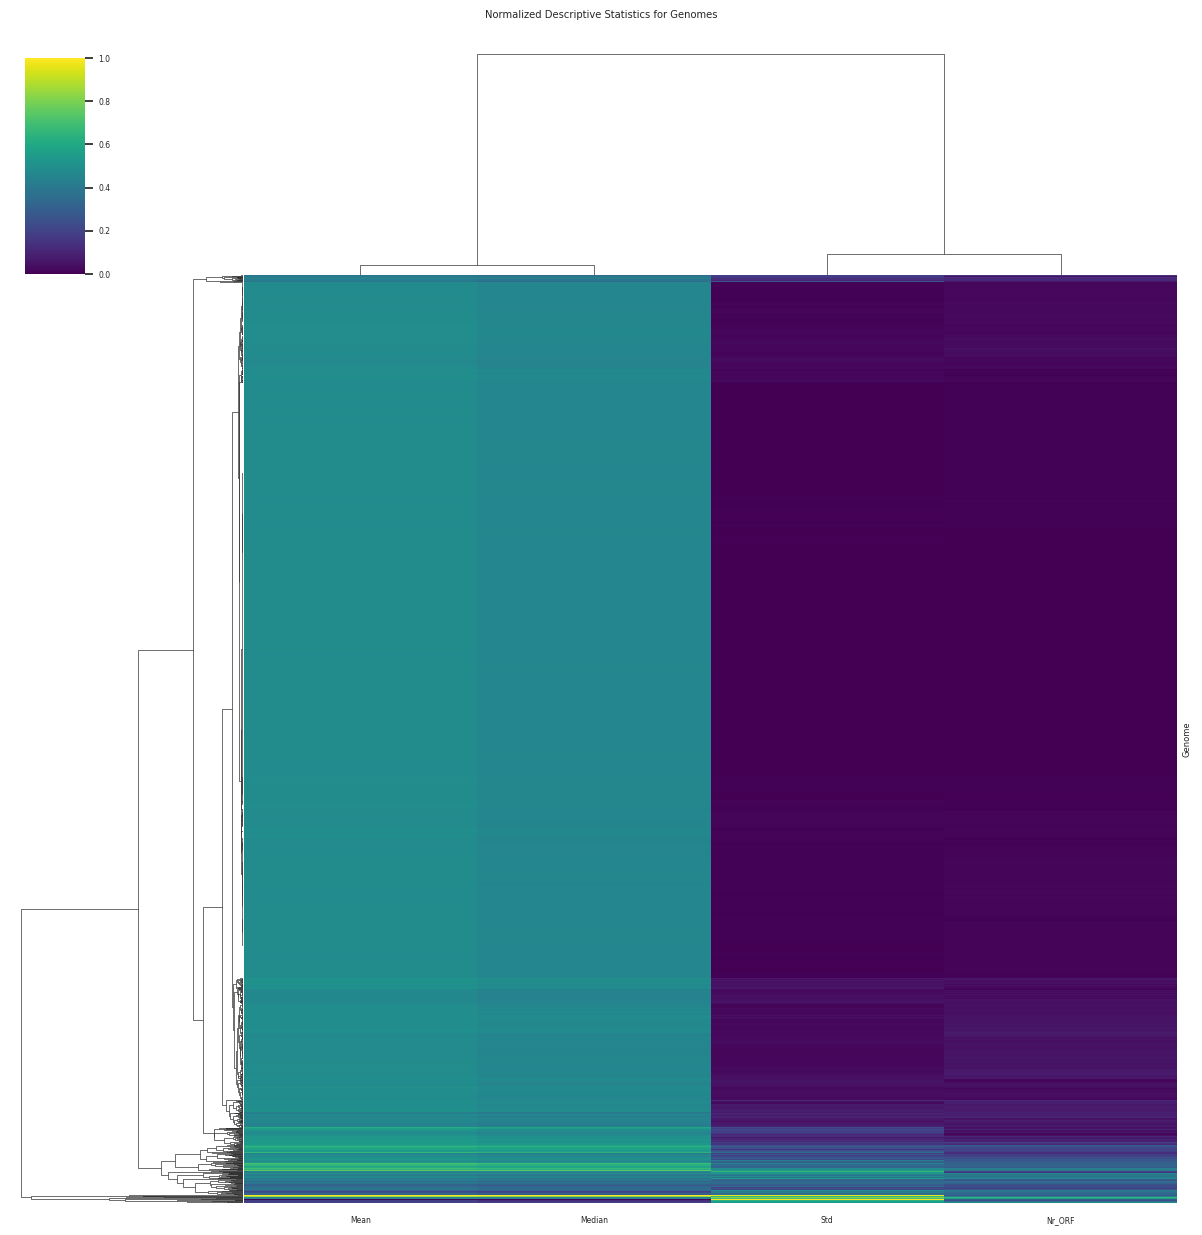

Normalized heatmap created successfully


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df_heat = orf_metrics_df[["Genome", "Mean", "Std", "Median", "Nr_ORF"]].set_index('Genome')

scaler = MinMaxScaler()
norm_values = scaler.fit_transform(df_heat.values)

# Create dataframe of normalized values
df_normalized = pd.DataFrame(norm_values, index=df_heat.index, columns=df_heat.columns)

# Plot a heatmap using clustermap which is better for large datasets
sns.set(font_scale=0.5)
clustermap = sns.clustermap(df_normalized, cmap='viridis', figsize=(12, 12), yticklabels=False, xticklabels=True)
clustermap.fig.suptitle('Normalized Descriptive Statistics for Genomes', y=1.02)
plt.show()

print('Normalized heatmap created successfully')

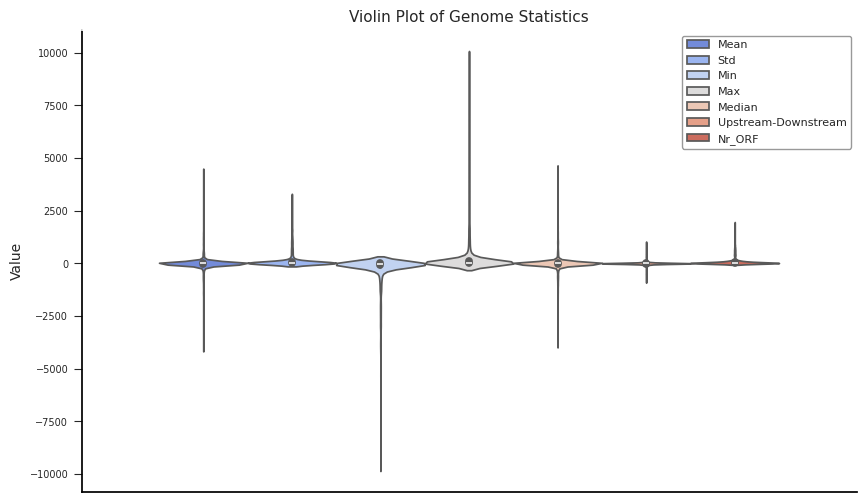

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_melted = orf_metrics_df.melt(id_vars=["Genome"], value_vars=["Mean", "Std", "Min", "Max", "Median", "Upstream-Downstream", "Nr_ORF"], var_name="Statistic", value_name="Value")

plt.figure(figsize=(10, 6))
sns.violinplot(hue="Statistic", y="Value", data=df_melted, palette="coolwarm")
plt.tick_params(reset=True, width=0.8, top=False, right=False, bottom=False)
plt.yticks(fontsize=7)
#plt.xlabel("xlabel", fontsize=12)
plt.ylabel("Value", fontsize=10)
plt.title("Violin Plot of Genome Statistics", fontsize=11)
plt.legend(facecolor="white", edgecolor="grey", fontsize=8)

ax = plt.gca()
ax.set_facecolor("white")
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.show()

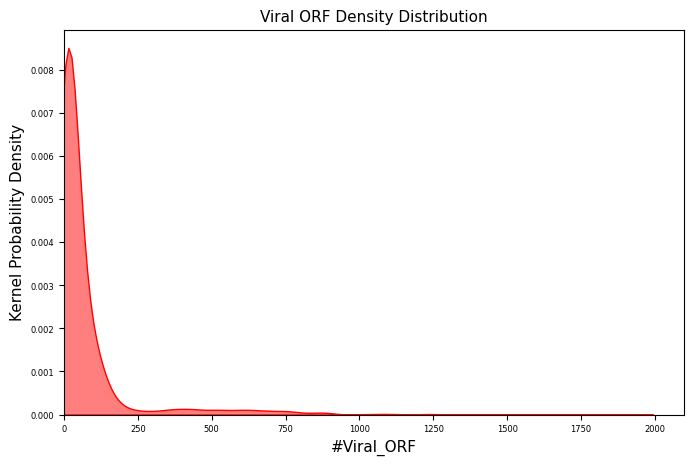

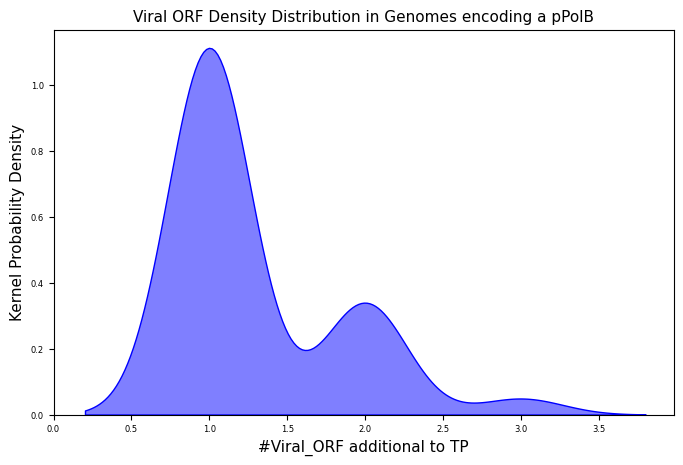

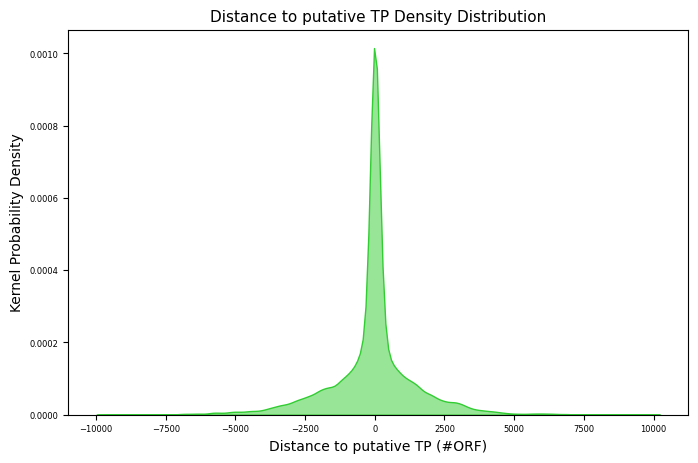

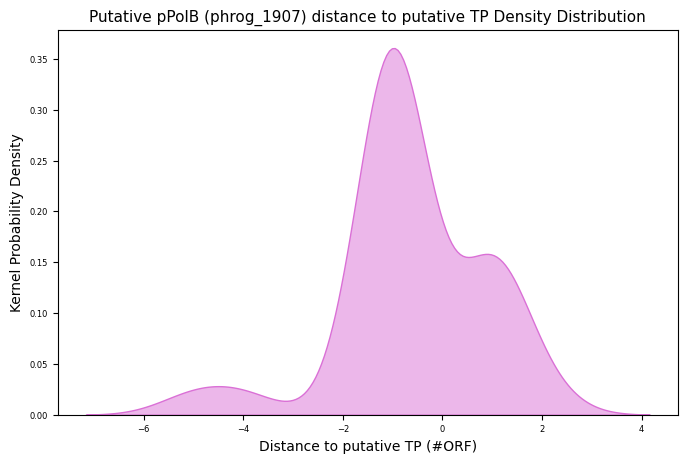

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#print(orf_number_list)
#print(orf_distance_list)

plt.figure(figsize=(8, 5))
sns.kdeplot(orf_number_list, fill=True, color="red", alpha=0.5)
plt.xlim(0, None)

plt.xlabel("#Viral_ORF", fontsize=11)
plt.ylabel("Kernel Probability Density", fontsize=11)
plt.title("Viral ORF Density Distribution", fontsize=11)
plt.tick_params(reset=True, width=0.8, top=False, right=False)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
ax = plt.gca()
ax.set_facecolor("white")
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(orf_metrics_df[orf_metrics_df["pPolB"]=="Y"]["Nr_ORF"].to_list(), fill=True, color="blue", alpha=0.5)
plt.xlim(0, None)

plt.xlabel("#Viral_ORF additional to TP", fontsize=11)
plt.ylabel("Kernel Probability Density", fontsize=11)
plt.title("Viral ORF Density Distribution in Genomes encoding a pPolB", fontsize=11)
plt.tick_params(reset=True, width=0.8, top=False, right=False)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
ax = plt.gca()
ax.set_facecolor("white")
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(orf_distance_list, fill=True, color="limegreen", alpha=0.5)

plt.xlabel("Distance to putative TP (#ORF)", fontsize=10)
plt.ylabel("Kernel Probability Density", fontsize=10)
plt.title("Distance to putative TP Density Distribution", fontsize=11)
plt.tick_params(reset=True, width=0.8, top=False, right=False)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
ax = plt.gca()
ax.set_facecolor("white")
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(orf_metrics_df[orf_metrics_df["pPolB"]=="Y"]["pPolB_distance"].to_list(), fill=True, color="orchid", alpha=0.5)

plt.xlabel("Distance to putative TP (#ORF)", fontsize=10)
plt.ylabel("Kernel Probability Density", fontsize=10)
plt.title("Putative pPolB (phrog_1907) distance to putative TP Density Distribution", fontsize=11)
plt.tick_params(reset=True, width=0.8, top=False, right=False)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
ax = plt.gca()
ax.set_facecolor("white")
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.show()


plt.figure(figsize=(8, 5))
sns.kdeplot(min_distance_list, fill=True, color="gold", alpha=0.5)

plt.xlabel("Distance to putative TP (#ORF)", fontsize=10)
plt.ylabel("Kernel Probability Density", fontsize=10)
plt.title("Minimum distance to putative TP Density Distribution", fontsize=11)
plt.tick_params(reset=True, width=0.8, top=False, right=False)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
ax = plt.gca()
ax.set_facecolor("white")
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.show()

In [ ]:
!pip install biopython
!apt-get update
!apt-get install ncbi-blast+

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.5 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,375 kB]
Get:12 https://r2u.stat.illinois

In [ ]:
# GET TP FASTA

import pandas as pd
from Bio import Entrez, SeqIO

ipg = pd.read_csv("IPG_results_FILTERED.csv")
tp_ids = ipg["Protein"].to_list()

Entrez.email = "juancarlos.ramirezm@estudiante.uam.es"

output_file = "TP_Retrieved_Dataset.fasta"

# Fetch sequences and write to a single FASTA file
with open(output_file, "w") as fasta_out:
    for protein_id in tp_ids:
        try:
            # Fetch the sequence in FASTA format
            with Entrez.efetch(db="protein", id=protein_id, rettype="fasta", retmode="text") as handle:
                seq_record = SeqIO.read(handle, "fasta")
                # Write to the output FASTA file
                SeqIO.write(seq_record, fasta_out, "fasta")
                print(f"Successfully retrieved: {protein_id}")
        except Exception as e:
            print(f"Failed to retrieve {protein_id}: {e}")

print(f"All sequences saved to {output_file}")


Successfully retrieved: NP_044190.1
Successfully retrieved: WPK28981.1
Successfully retrieved: AFD22004.1
Successfully retrieved: WP_087972990.1
Successfully retrieved: WP_063336313.1
Successfully retrieved: MDB4339469.1
Successfully retrieved: WPJ21176.1
Successfully retrieved: QDH49043.1
Successfully retrieved: WP_061511719.1
Successfully retrieved: XBY87759.1
Successfully retrieved: AIS19786.1
Successfully retrieved: ALB78183.1
Successfully retrieved: UVY45549.1
Successfully retrieved: DAO80396.1
Successfully retrieved: HEY8985452.1
Successfully retrieved: CAD5240754.1
Successfully retrieved: WP_060812158.1
Successfully retrieved: YP_009910369.1
Successfully retrieved: AOC84064.1
Successfully retrieved: NP_817303.1
Successfully retrieved: MAI05278.1
Successfully retrieved: APU01937.1
Successfully retrieved: MAJ57753.1
Successfully retrieved: BCU95600.1
Successfully retrieved: MAI82168.1
Successfully retrieved: WP_138909107.1
Successfully retrieved: WP_388741811.1
Successfully retrie

# **geNomad**

In [ ]:
from Bio import Entrez, SeqIO
import subprocess
import os
import glob

Entrez.email = "juancarlos.ramirezm@estudiante.uam.es"

files = [f for f in os.listdir(".") if f.endswith(".tar.gz")]
for zip in files:
  subprocess.run(f"tar -xvf {zip}", shell=True)

fastas = [f for f in os.listdir() if f.endswith(".fasta")]
genomeid_list = []
for fasta in fastas:
  genomeid_list.append(fasta.split("_CONTEXT")[0])

print(genomeid_list)

def fetch_sequence_and_save(accession):
    if accession:
        print(f"Fetching {accession}")
        try:
            with Entrez.efetch(db="nuccore", id=accession, rettype="fasta", retmode="text") as handle:
                # Use SeqIO.parse in case the record comes as multiple parts
                records = list(SeqIO.parse(handle, "fasta"))
                if not records:
                    raise ValueError("No records found")
                record = records[0]

                # Save the record to a GenBank file named after the accession
                with open(f"{accession}.fasta", "w") as gbk_out:
                    SeqIO.write(record, gbk_out, "fasta")
                print(f"Successfully retrieved and saved: {accession}")
                return record
        except Exception as e:
            print(f"Error fetching {accession}: {e}")
            print("No FASTA file available")
            with open("GENOME_ERRORS.txt", "a") as error_file:
                error_file.write(f"{accession}\n")
            return None

# Iterate over each Genome ID and fetch the corresponding sequence
for genomeid in genomeid_list:
    fetch_sequence_and_save(genomeid)

for file in glob.glob("*_CONTEXT.fasta"):
    os.remove(file)

subprocess.run("tar -czvf Representative_Genomes_NEW.tar.gz *.fasta")
subprocess.run("tar -czvf 0000.tar.gz *.fasta")

['RHBQ01000476.1', 'NZ_QAJI01000003.1', 'LR796696.1', 'SOJH01000736.1', 'NZ_CAHP01000014.1', 'KF547927.1', 'NHGR01000066.1', 'NZ_BALE01000033.1', 'NZ_JH414596.1', 'LR797075.1', 'NC_048792.1', 'NC_009760.1', 'NZ_CP008743.1', 'LR797817.1', 'DRSA01001243.1', 'BK036925.1', 'JBDUAY010000030.1', 'NC_070869.1', 'DOTW01000308.1', 'DVIU01000089.1', 'NZ_JAAKGO010000015.1', 'NZ_AUNE01000029.1', 'NZGN01000038.1', 'BK057936.1', 'NZAU01000155.1', 'LR796380.1', 'PFNY01000303.1', 'NZRF01000237.1', 'NZ_JAHSTZ010000037.1', 'MU278360.1', 'ADAD01000082.1', 'NZ_BSSZ01000013.1', 'DPHC01000024.1', 'DUZG01000086.1', 'NZ_AOII01000038.1', 'JAWCMB010000011.1', 'KP412538.1', 'NC_048651.1', 'PEZJ01000009.1', 'NC_017770.1', 'BK018285.1', 'VAZZ01000490.1', 'MH884512.1', 'NC_048709.1', 'BK026416.1', 'BK066675.1', 'DATHOG010000003.1', 'JAKUQG010000222.1', 'LR798243.1', 'NZ_LT907975.1', 'WQTZ01000078.1', 'QMLL01000279.1', 'NC_019521.1', 'QHWK01000412.1', 'MK072066.1', 'NZ_QMFA01000002.1', 'NC_070873.1', 'QNAP01000178.1

FileNotFoundError: [Errno 2] No such file or directory: 'tar -czvf Representative_Genomes_NEW.tar.gz *.fasta'

In [ ]:
!tar -czvf Representative_Genomes_NEW.tar.gz *.fasta
!tar -czvf 0000.tar.gz *.fasta

ABBGAK010000009.1.fasta
ABJPJW010000008.1.fasta
ABXP02000122.1.fasta
ADAD01000082.1.fasta
AJ586898.1.fasta
ALJD01000016.1.fasta
AMFJ01005424.1.fasta
AP013912.1.fasta
AP014200.1.fasta
AP017647.1.fasta
AP019525.1.fasta
ATBP01001652.1.fasta
AUSU01001187.1.fasta
AWSJ01000245.1.fasta
AY822469.1.fasta
AY848684.1.fasta
AZFC01000030.1.fasta
AZRA01000001.1.fasta
BCNO01000002.1.fasta
BDQX01000096.1.fasta
BDSW01000143.1.fasta
BEIQ01000001.1.fasta
BFAA01021776.1.fasta
BGZN01000059.1.fasta
BJFU01000002.1.fasta
BK013345.1.fasta
BK013347.1.fasta
BK014698.1.fasta
BK014751.1.fasta
BK014853.1.fasta
BK014964.1.fasta
BK015140.1.fasta
BK015217.1.fasta
BK015539.1.fasta
BK015645.1.fasta
BK015667.1.fasta
BK015689.1.fasta
BK015897.1.fasta
BK015931.1.fasta
BK015936.1.fasta
BK015993.1.fasta
BK016086.1.fasta
BK016121.1.fasta
BK016125.1.fasta
BK016136.1.fasta
BK016182.1.fasta
BK016274.1.fasta
BK016314.1.fasta
BK016585.1.fasta
BK016733.1.fasta
BK017080.1.fasta
BK017141.1.fasta
BK017257.1.fasta
BK017272.1.fasta
BK01

In [ ]:
!cp GENOME_ERRORS.txt 0001.txt

cp: cannot stat 'GENOME_ERRORS.txt': No such file or directory


In [ ]:
import subprocess
import os

files = [f for f in os.listdir(".") if f.endswith(".tar.gz")]
for zip in files:
  subprocess.run(f"tar -xvf {zip}", shell=True)

subprocess.run("cat ./*.fasta > TP_genomes.fasta", shell=True)
subprocess.run("cat ./*.fasta > 0000.fasta", shell=True)

CompletedProcess(args='cat ./*.fasta > 0000.fasta', returncode=0)

In [ ]:
# Generate Genomic Nucleotide Contexts
import pandas as pd
import subprocess
import os

files = [f for f in os.listdir(".") if f.endswith(".tar.gz")]
for zip in files:
  subprocess.run(f"tar -xvf {zip}", shell=True)

IPG = pd.read_csv('IPG_results_FILTERED.csv')
IPG.loc[len(IPG)] = [000000, "UniProtKB", "GG666582.1", 881066, 881362, "+", "C3Z4X6", "Uncharacterized protein", "Branchiostoma floridae", None, None, 332]

fastas = [f for f in os.listdir() if f.endswith(".fasta")]
#fastas = ["NC_001734.1.fasta"]
for fasta in fastas:
  with open(fasta, "r") as fasta_file:
    content = fasta_file.read()
    print(f"Processing {fasta}")
    #print(fasta_file.readlines())
    fasta_lines = content.splitlines()
    genome_lore = ''.join(fasta_lines[1:])
    genome_lore = genome_lore.replace("\n", "")
    #print(genome_lore)
    print(f"Genome length: {len(genome_lore)}")
    genome_name = fasta.split(".")[0]
    tp_start = IPG[IPG["Nucleotide Accession"] == fasta.split(".fasta")[0]]["Start"].astype('Int64').iloc[0]
    print(f"TP starting position: {tp_start}")
    tp_start = int(tp_start) - 1 # Pythonic position
    tp_end = IPG[IPG["Nucleotide Accession"] == fasta.split(".fasta")[0]]["Stop"].astype('Int64').iloc[0]
    print(f"TP ending position: {tp_end}")
    tp_end = int(tp_end) - 1 # Pythonic position
    tp_len = tp_end - tp_start
    print(f"TP length: {tp_len}")
    if len(genome_lore) <= (60000 + int(tp_len)):
      with open(f"{fasta.split('.fasta')[0]}_nt_CONTEXT.fasta", "w") as context_file:
        context_file.write(content)
    else:
      genome_length = len(genome_lore)
      trim_start = max(tp_start - 30000, 0)
      trim_end = min(tp_end + 30000, genome_length)
      genome_ctxt = genome_lore[trim_start:trim_end]
      with open(f"{fasta.split('.fasta')[0]}_nt_CONTEXT.fasta", "w") as context_file:
        context_file.write(fasta_lines[0]+"\n"+genome_ctxt)
subprocess.run("tar -czvf Representative_Genomes_nt_CONTEXT.tar.gz *_nt_CONTEXT.fasta", shell=True)
subprocess.run("tar -czvf 0011.tar.gz *_nt_CONTEXT.fasta", shell=True)

Se han truncado las últimas 5000 líneas del flujo de salida.
Processing NZ_FNHZ01000001.1.fasta
Genome length: 948718
TP starting position: 682639
TP ending position: 686436
TP length: 3797
Processing MN582103.1.fasta
Genome length: 53969
TP starting position: 18444
TP ending position: 19064
TP length: 620
Processing NC_003071.7.fasta
Genome length: 19698289
TP starting position: 16834065
TP ending position: 16835711
TP length: 1646
Processing NZ_NZGW01000060.1.fasta
Genome length: 57352
TP starting position: 23664
TP ending position: 24236
TP length: 572
Processing DUBF01000183.1.fasta
Genome length: 12743
TP starting position: 7504
TP ending position: 8148
TP length: 644
Processing NZHO01000040.1.fasta
Genome length: 10279
TP starting position: 7560
TP ending position: 8120
TP length: 560
Processing NC_024451.1.fasta
Genome length: 220222
TP starting position: 82102
TP ending position: 82911
TP length: 809
Processing JARYME010000014.1.fasta
Genome length: 42790
TP starting position: 

CompletedProcess(args='tar -czvf 0011.tar.gz *_nt_CONTEXT.fasta', returncode=0)

In [ ]:
# geNomad definitive script

import subprocess
import os

files = [f for f in os.listdir(".") if f.endswith(".fasta")]
for file in files:
  with open(file, "a") as fasta:
    fasta.write("\n")
subprocess.run("cat ./*.fasta > temp_1.fasta", shell=True)
subprocess.run("sudo -s", shell=True)
subprocess.run("conda activate /home/eduardo/miniconda3/envs/seqkit/", shell=True)
subprocess.run("seqkit seq -w 60 temp_1.fasta > temp_2.fasta", shell=True)
subprocess.run("mkdir ../geNomad", shell=True)
subprocess.run("conda deactivate", shell=True)
subprocess.run("cat temp_2.fasta | tr -s '\n' > TP_genomes.fasta", shell=True)
subprocess.run("grep -E 'A>|C>|T>|G>|N>' TP_genomes.fasta", shell=True)
subprocess.run("rm temp_1.fasta", shell=True)
subprocess.run("rm temp_2.fasta", shell=True)
subprocess.run("conda activate /home/eduardo/miniconda3/envs/mge/", shell=True)


print("Starting Annotation!")
# Annotation and Scrutiny
try:
  subprocess.run(f"genomad end-to-end --enable-score-calibration -t 32 ./TP_genomes.fasta ../geNomad/ /mnt/disk2/databases/genomad_db/", shell=True)
except:
  with open("geNomad_ERRORS.txt", "a") as f:
    f.write(f"{fasta}\n")
subprocess.run("conda deactivate", shell=True)

In [ ]:
import pandas as pd
import os
import subprocess

viruses = pd.read_csv("TP_genomes_virus_summary.tsv", sep="\t")
viruses

files = [f for f in os.listdir(".") if f.endswith(".tar.gz")]
for zip in files:
  subprocess.run(f"tar -xvf {zip}", shell=True)
files = [f for f in os.listdir(".") if f.endswith(".fasta")]
viral_genomes = viruses["seq_name"].to_list()
clean_viral_genomes = []
for viral in viral_genomes:
  if "|" in viral:
    viral = viral.split("|")[0]
    clean_viral_genomes.append(viral)
  else:
    clean_viral_genomes.append(viral)

non_viral_genomes = []
for fasta in files:
  if fasta.split("_")[0] not in clean_viral_genomes:
    print(fasta.split("_nt")[0])
    non_viral_genomes.append(fasta.split("_nt")[0])
    with open("geNomad_non_viral_genomes.txt", "a") as nvg:
      nvg.write(fasta.split("_nt")[0] + "\n")
    with open("0000.txt", "a") as alt:
      alt.write(fasta.split("_nt")[0] + "\n")
print(len(non_viral_genomes))

NC_028664.1
QQUL01000309.1
NZ_MJKL01000008.1
SHMU01000065.1
NC_016163.1
FQVH01000020.1
NZ_JAERME010000001.1
RBMR01000006.1
FUWX01000008.1
NZ_JANQBD010000015.1
DMHF01000022.1
NC_024150.1
NZ_JQCB01000003.1
NZ_FPAT01000007.1
CP048620.1
SIBC01000102.1
SCVU01000559.1
QWQU01000012.1
DASPIX010000166.1
NC_049820.1
NZ_JABEQN010000004.1
JBDRQK010000269.1
QMWC01000179.1
DTZL01000121.1
NZ_CP009044.1
NC_009464.1
NZ_DDYV01000209.1
NZ_BBYR01000037.1
PBMZ01000187.1
NZ_JACGXN010000011.1
NC_049496.1
NC_047858.1
NC_049968.1
NZ_JBDGIA010000015.1
QGUG01000586.1
NZ_CP019964.1
NC_070869.1
NZ_QZCH01000008.1
JAQWCM010000170.1
NZ_NUIO01000079.1
NZ_WEZG01000004.1
NZ_RBAH01000002.1
NC_020850.1
FNFC01000017.1
NC_047900.1
MNVA01000076.1
NZ_SRUW01000008.1
NC_030948.1
NZ_JBHSYT010000001.1
NC_070861.1
NC_048172.1
NZ_LWTT01000002.1
JASGUH010000008.1
DAOLBH010000694.1
NZ_SMFZ01000002.1
DUQM01000036.1
NC_023587.1
JAAZMA010000200.1
QNAP01000178.1
NZ_AYXY01000019.1
NZ_CP171125.1
NC_020813.1
NC_047746.1
MHMA01000019.1
NC_02

In [ ]:
import pandas as pd
import subprocess

safe_nonviral = []

geNomad = []
with open("geNomad_non_viral_genomes.txt", "r") as non_viral:
  non_viral_genomes = non_viral.readlines()
  for genome in non_viral_genomes:
    if genome != "\n" or genome != " ":
      geNomad.append(genome.split("\n")[0].split(".")[0])

PHROG_data = pd.read_csv("ORF_metrics_DEF+pol.tsv", sep="\t")
viral_genomes = PHROG_data["Genome"].to_list()

for nv_genome in geNomad:
  if nv_genome not in viral_genomes:
    safe_nonviral.append(nv_genome)
  else:
    if PHROG_data[PHROG_data["Genome"] == nv_genome]["Nr_ORF"].iloc[0] <= 3:
      safe_nonviral.append(nv_genome)
      print(f"{nv_genome} has {PHROG_data[PHROG_data['Genome'] == nv_genome]['Nr_ORF'].iloc[0]} viral genes")

print(safe_nonviral)
print(len(safe_nonviral))
with open("geNomad_safe_non_viral_genomes_expanded.txt", "a") as nvg:
  for genome in safe_nonviral:
    nvg.write(genome + "\n")

SHMU01000065 has 3 viral genes
DMHF01000022 has 1 viral genes
NC_024150 has 1 viral genes
PBMZ01000187 has 3 viral genes
QGUG01000586 has 1 viral genes
MNVA01000076 has 2 viral genes
DUQM01000036 has 1 viral genes
JAAZMA010000200 has 1 viral genes
MHMA01000019 has 1 viral genes
JAGIAN010000191 has 3 viral genes
PCBX01000061 has 1 viral genes
JANWYV010000002 has 2 viral genes
DASXVN010000054 has 2 viral genes
QHTA01000108 has 3 viral genes
PAMN02000047 has 1 viral genes
MUCY01000039 has 1 viral genes
PCTM01000008 has 3 viral genes
RGKA01000088 has 2 viral genes
MWKR01000018 has 3 viral genes
DATBGG010000020 has 2 viral genes
NZ_FQZU01000072 has 1 viral genes
JAAYZB010000009 has 1 viral genes
JAVZYH010000010 has 2 viral genes
JAFBAJ010000708 has 1 viral genes
JAIPJC010000134 has 1 viral genes
JAAYYI010000101 has 2 viral genes
JADLHF010000091 has 1 viral genes
NZ_QWDC01000007 has 2 viral genes
NZ_PGQJ01000021 has 3 viral genes
NZGX01000028 has 3 viral genes
JACQRL010000198 has 1 viral gen

In [ ]:
import pandas as pd

main = pd.read_csv("FULL_results+GenomeID+Tax+Cluster+BLASTp_Synonyms+IPG+Non-Viral+eggNOG+Pol.csv")
main.keys()
main["GenomeID_less"] = main["Reference_GenomeID"].str.split(".").str[0]

non_virals = []
with open("geNomad_safe_non_viral_genomes_expanded.txt", "r") as nvg:
  non_viral_genomes = nvg.readlines()
  for genome in non_viral_genomes:
    if genome != "\n" or genome != " ":
      non_virals.append(genome.split("\n")[0].split(".")[0])

eggNOG_funcs = []
for i in non_virals:
  func = main[main["GenomeID_less"] == i]["eggNOG_Annotation"].astype("str").iloc[0]
  print(func)
  eggNOG_funcs.append(func)
  with open("Non_viral_eggNOG_funcs.txt", "a") as nvf:
    nvf.write(func + "\n")
print(len(eggNOG_funcs))

domain, Protein
NOVQVVKF
nan
Adenoviral DNA terminal protein
Periplasmic copper-binding protein (NosD)
nan
nan
nan
Domain of unknown function DUF83
Periplasmic copper-binding protein (NosD)
glycerophosphodiester phosphodiesterase activity
CRISPR-associated protein Cas4
ATP-dependent DNA helicase activity
nan
nan
ATP-dependent helicase nuclease subunit A
Domain of unknown function DUF83
nan
-
Belongs to the helicase family. UvrD subfamily
TIGRFAM CRISPR-associated protein Cas4
nan
nan
nan
Adenoviral DNA terminal protein
nan
nan
nan
nan
epimerase dehydratase
Domain of unknown function DUF83
Right handed beta helix region
nan
nan
nan
CRISPR-associated protein Cas4
nan
Glycosyl hydrolases family 28
nan
nan
nan
Pectate lyase superfamily protein
Glycosyl hydrolases family 28
nan
nan
Glycosyl hydrolases family 28
CRISPR-associated protein Cas4
nan
nan
nan
nan
-
Glycosyl hydrolases family 28
nan
nan
PD-(D/E)XK nuclease superfamily
nan
ATP-dependent helicase nuclease subunit A
Protein conserved

In [ ]:
from re import sub
import os
import subprocess

tar = [f for f in os.listdir(".") if f.endswith(".tar.gz")]
for t in tar:
  subprocess.run(f"tar -xvf {t}", shell=True)

subprocess.run("tar -czvf FoldSeek_AFDB50_Dedup_Structures+Queries.tar.gz *.pdb", shell=True)
subprocess.run("tar -czvf 0000.tar.gz *.pdb", shell=True)

CompletedProcess(args='tar -czvf 0000.tar.gz *.pdb', returncode=0)

In [ ]:
import pandas as pd

main = pd.read_csv("FULL_results+GenomeID+Tax+Cluster+BLASTp_Synonyms+IPG+Non-Viral+eggNOG+Pol.csv")
main.keys()
main["GenomeID_less"] = main["Reference_GenomeID"].str.split(".").str[0]

non_virals = []
with open("geNomad_safe_non_viral_genomes_expanded.txt", "r") as nvg:
  non_viral_genomes = nvg.readlines()
  for genome in non_viral_genomes:
    if genome != "\n" or genome != " ":
      non_virals.append(genome.split("\n")[0].split(".")[0])

TP_df = pd.DataFrame(columns = ["TP", "eggNOG_Annotation"])
for i in non_virals:
  func_df = main[main["GenomeID_less"] == i][["TP", "eggNOG_Annotation"]]
  print(func_df)
  TP_df = pd.concat([TP_df, func_df], axis=0, ignore_index=True)

TP_df.rename(columns={"TP": "TP_Query"})
TP_df.drop_duplicates(inplace=True)
TP_df.to_csv("Query_TP_eggNOG_funcs.csv", index=False)
TP_df

       TP eggNOG_Annotation
3083  GC1   domain, Protein
       TP eggNOG_Annotation
2531  ABV          NOVQVVKF
       TP eggNOG_Annotation
2102  GC1               NaN
         TP                eggNOG_Annotation
71  PiAdV-1  Adenoviral DNA terminal protein
       TP                          eggNOG_Annotation
1625  GC1  Periplasmic copper-binding protein (NosD)
       TP eggNOG_Annotation
2513  GC1               NaN
       TP eggNOG_Annotation
2610  GC1               NaN
       TP eggNOG_Annotation
2771  GC1               NaN
       TP                 eggNOG_Annotation
1915  ABV  Domain of unknown function DUF83
       TP                          eggNOG_Annotation
2881  GC1  Periplasmic copper-binding protein (NosD)
       TP                                 eggNOG_Annotation
2777  GC1  glycerophosphodiester phosphodiesterase activity
       TP               eggNOG_Annotation
2558  ABV  CRISPR-associated protein Cas4
       TP                    eggNOG_Annotation
2924  ABV  ATP-dependen

,TP,eggNOG_Annotation
0,GC1,"domain, Protein"
1,ABV,NOVQVVKF
2,GC1,NaN
3,PiAdV-1,Adenoviral DNA terminal protein
4,GC1,Periplasmic copper-binding protein (NosD)
...,...,...
375,ABV,COG1199 Rad3-related DNA helicases
378,S-SCSM1,Transcriptional regulator
381,Sato,NaN
408,ABV,UvrD REP helicase


In [ ]:
import pandas as pd

main = pd.read_csv("FULL_results+GenomeID+Tax+Cluster+BLASTp_Synonyms+IPG+Non-Viral+eggNOG+Pol.csv")
main.keys()
main["GenomeID_less"] = main["Reference_GenomeID"].str.split(".").str[0]

non_virals = []
with open("geNomad_safe_non_viral_genomes_expanded.txt", "r") as nvg:
  non_viral_genomes = nvg.readlines()
  for genome in non_viral_genomes:
    if genome != None and (genome != "\n" or genome != " "):
      non_virals.append(genome.split("\n")[0].split(".")[0])

TP_df = pd.DataFrame(columns = ["TP"])
for i in non_virals:
  query_df = main[main["GenomeID_less"] == i][["TP"]]
  print(query_df)
  TP_df = pd.concat([TP_df, query_df], axis=0, ignore_index=True)

TP_df.rename(columns={"TP": "TP_Query"})
TP_df.to_csv("Non_viral_query_TP_pseudorollback.csv", index=False)
TP_df

       TP
3083  GC1
       TP
2531  ABV
       TP
2102  GC1
         TP
71  PiAdV-1
       TP
1625  GC1
       TP
2513  GC1
       TP
2610  GC1
       TP
2771  GC1
       TP
1915  ABV
       TP
2881  GC1
       TP
2777  GC1
       TP
2558  ABV
       TP
2924  ABV
3255  ABV
       TP
1591  GC1
       TP
2444  ABV
       TP
1521  ABV
       TP
1928  ABV
       TP
2781  GC1
       TP
2671  ABV
       TP
2290  ABV
       TP
2122  ABV
       TP
1864  GC1
       TP
2079  GC1
       TP
2201  GC1
         TP
23  PiAdV-1
       TP
2599  ABV
       TP
1779  ABV
       TP
1507  GC1
       TP
2118  GC1
           TP
924  DSL-LC02
       TP
2656  ABV
       TP
1797  GC1
       TP
1488  ABV
       TP
2996  ABV
       TP
2587  GC1
       TP
3178  ABV
       TP
1540  GC1
1586  GC1
       TP
2274  GC1
       TP
1729  GC1
       TP
1468  GC1
       TP
1611  GC1
       TP
2137  GC1
       TP
2532  GC1
2533  GC1
2534  GC1
2535  GC1
2536  GC1
2537  GC1
2538  GC1
2539  GC1
       TP
1969  ABV
       TP
2454

,TP
0,GC1
1,ABV
2,GC1
3,PiAdV-1
4,GC1
...,...
426,GC1
427,GC1
428,GC1
429,ABV


In [ ]:
#Extract non-viral representative Genome, querying TP and hit and eggNOG-mapper functional annotation
import pandas as pd

main = pd.read_csv("FULL_results+GenomeID+Tax+Cluster+BLASTp_Synonyms+IPG+Non-Viral+eggNOG+Pol.csv")
main.keys()
main["GenomeID_less"] = main["Reference_GenomeID"].str.split(".").str[0]

non_virals = []
with open("geNomad_safe_non_viral_genomes_expanded.txt", "r") as nvg:
  non_viral_genomes = nvg.readlines()
  for genome in non_viral_genomes:
    if genome != "\n" or genome != " ":
      non_virals.append(genome.split("\n")[0].split(".")[0])

TP_df = pd.DataFrame(columns = ["Reference_GenomeID", "TP", "Hit", "IPG_Synonym", "eggNOG_Annotation"])
for i in non_virals:
  print(f"GENOME: {i}")
  query_df = main[main["GenomeID_less"] == i][["Reference_GenomeID", "TP", "Hit", "IPG_Synonym", "eggNOG_Annotation"]]
  print(query_df)
  TP_df = pd.concat([TP_df, query_df], axis=0, ignore_index=True)
  print("------------")

TP_df.to_csv("Non_viral_query_TP_pseudorollback_2.csv", index=False)
TP_df

GENOME: QQUL01000309
     Reference_GenomeID   TP         Hit   IPG_Synonym eggNOG_Annotation
3083     QQUL01000309.1  GC1  A0A6A0QRL4  KAA3636401.1   domain, Protein
------------
GENOME: SHMU01000065
     Reference_GenomeID   TP         Hit IPG_Synonym eggNOG_Annotation
2531     SHMU01000065.1  ABV  A0A5C9ER47  TXT63892.1          NOVQVVKF
------------
GENOME: DMHF01000022
     Reference_GenomeID   TP         Hit IPG_Synonym eggNOG_Annotation
2102     DMHF01000022.1  GC1  A0A2E2B4V4  HAI10210.1               NaN
------------
GENOME: NC_024150
   Reference_GenomeID       TP             Hit     IPG_Synonym  \
71        NC_024150.1  PiAdV-1  YP_009032608.1  YP_009032608.1   

                  eggNOG_Annotation  
71  Adenoviral DNA terminal protein  
------------
GENOME: SIBC01000102
     Reference_GenomeID   TP         Hit IPG_Synonym  \
1625     SIBC01000102.1  GC1  MSU42409.1  MSU42409.1   

                              eggNOG_Annotation  
1625  Periplasmic copper-binding protein (No

,Reference_GenomeID,TP,Hit,IPG_Synonym,eggNOG_Annotation
0,QQUL01000309.1,GC1,A0A6A0QRL4,KAA3636401.1,"domain, Protein"
1,SHMU01000065.1,ABV,A0A5C9ER47,TXT63892.1,NOVQVVKF
2,DMHF01000022.1,GC1,A0A2E2B4V4,HAI10210.1,NaN
3,NC_024150.1,PiAdV-1,YP_009032608.1,YP_009032608.1,Adenoviral DNA terminal protein
4,SIBC01000102.1,GC1,MSU42409.1,MSU42409.1,Periplasmic copper-binding protein (NosD)
...,...,...,...,...,...
426,JAAMPI010000147.1,GC1,KAF4634998.1,KAF4634998.1,Pectate lyase superfamily protein
427,JAVRRG010000237.1,GC1,KAK5075880.1,KAK5075880.1,"Glucan 1,3-beta-glucosidase"
428,JAOPUW010000102.1,GC1,MCW2507520.1,MCW2507520.1,NaN
429,MWAU01000060.1,ABV,A0A1V5PYH6,OQA22617.1,NaN


In [ ]:
import pandas as pd
query_funcs = pd.read_csv("Query_TP_eggNOG_funcs.csv")
query_funcs = query_funcs.drop_duplicates()
query_funcs = query_funcs.sort_values(by='TP')
query_funcs = query_funcs.reset_index(drop=True)
query_funcs.to_csv("UNIQUE_Query_TP_eggNOG_funcs.csv", index=False)

In [ ]:
# COG
import pandas as pd

main = pd.read_csv("FULL_results+GenomeID+Tax+Cluster+BLASTp_Synonyms+IPG+Non-Viral+eggNOG+Pol+COG.csv")
main["GenomeID_less"] = main["Reference_GenomeID"].str.split(".").str[0]

non_virals = []
with open("geNomad_safe_non_viral_genomes_expanded.txt", "r") as nvg:
  non_viral_genomes = nvg.readlines()
  for genome in non_viral_genomes:
    if genome != "\n" or genome != " ":
      non_virals.append(genome.split("\n")[0].split(".")[0])

eggNOG_COG = []
for i in non_virals:
  COG = main[main["GenomeID_less"] == i]["COG_Category"].astype("str").iloc[0]
  print(COG)
  # Divide dual COG
  if COG != 'nan' and isinstance(COG, str) and len(COG) > 1:
    COG1 = COG[0]
    COG2 = COG[1]
    eggNOG_COG.append(COG1)
    with open("Non_viral_COG.txt", "a") as nvc:
      nvc.write(COG1 + "\n")
    eggNOG_COG.append(COG2)
    with open("Non_viral_COG.txt", "a") as nvc:
      nvc.write(COG2 + "\n")
  else:
    eggNOG_COG.append(COG)
    with open("Non_viral_COG.txt", "a") as nvc:
      nvc.write(COG + "\n")
print(len(eggNOG_COG))

['U',
 'nan',
 'nan',
 'S',
 'M',
 'nan',
 'nan',
 'nan',
 'L',
 'S',
 'C',
 'V',
 'L',
 'nan',
 'nan',
 'L',
 'V',
 'nan',
 '-',
 'L',
 'L',
 'nan',
 'nan',
 'nan',
 'S',
 'nan',
 'nan',
 'nan',
 'nan',
 'G',
 'M',
 'L',
 'M',
 'nan',
 'nan',
 'nan',
 'L',
 'nan',
 'G',
 'nan',
 'nan',
 'nan',
 'G',
 'G',
 'nan',
 'nan',
 'G',
 'L',
 'nan',
 'nan',
 'nan',
 'nan',
 '-',
 'G',
 'nan',
 'nan',
 'L',
 'nan',
 'L',
 'L',
 'L',
 'L',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'S',
 'nan',
 'nan',
 'L',
 'G',
 'nan',
 'nan',
 'L',
 'nan',
 'L',
 'nan',
 'G',
 'nan',
 'nan',
 'nan',
 'S',
 'nan',
 'L',
 'L',
 'nan',
 'K',
 'L',
 'L',
 'nan',
 'L',
 'nan',
 'nan',
 'nan',
 'nan',
 'L',
 'G',
 'nan',
 'L',
 'L',
 'S',
 'nan',
 'nan',
 'L',
 'nan',
 'L',
 'L',
 'S',
 'nan',
 'nan',
 'nan',
 'L',
 'L',
 'nan',
 'L',
 'nan',
 'nan',
 'nan',
 'L',
 'nan',
 'S',
 'nan',
 'nan',
 'L',
 'S',
 'L',
 'nan',
 'L',
 'P',
 'L',
 'G',
 'L',
 'nan',
 'L',
 'nan',
 'M',
 'S',
 'nan',
 'S',
 'nan',
 'na

In [ ]:
import pandas as pd
import numpy as np

main = pd.read_csv("FULL_results+GenomeID+Tax+Cluster+BLASTp_Synonyms+IPG+Non-Viral+eggNOG+Pol+COG.csv")
main.keys()
main["GenomeID_less"] = main["Reference_GenomeID"].str.split(".").str[0]

non_virals = []
with open("geNomad_safe_non_viral_genomes_expanded.txt", "r") as nvg:
  non_viral_genomes = nvg.readlines()
  for genome in non_viral_genomes:
    if genome != "\n" or genome != " ":
      non_virals.append(genome.split("\n")[0].split(".")[0])

TP_df = pd.DataFrame(columns = ["TP", "COG_Category"])
for i in non_virals:
  COG_df = main[main["GenomeID_less"] == i][["TP", "COG_Category"]]
  COG_df["COG_Category"] = COG_df["COG_Category"].apply(lambda x: list(x) if pd.notna(x) else [np.nan])
  COG_df = COG_df.explode("COG_Category").reset_index(drop=True)
  print(COG_df)
  TP_df = pd.concat([TP_df, COG_df], axis=0, ignore_index=True)

TP_df.rename(columns={"TP": "TP_Query"})
TP_df.drop_duplicates(inplace=True)
TP_df.to_csv("Query_TP_eggNOG_COG.csv", index=False)
TP_df

    TP COG_Category
0  GC1            U
    TP COG_Category
0  ABV          NaN
    TP COG_Category
0  GC1          NaN
        TP COG_Category
0  PiAdV-1            S
    TP COG_Category
0  GC1            M
    TP COG_Category
0  GC1          NaN
    TP COG_Category
0  GC1          NaN
    TP COG_Category
0  GC1          NaN
    TP COG_Category
0  ABV            L
    TP COG_Category
0  GC1            S
    TP COG_Category
0  GC1            C
    TP COG_Category
0  ABV            V
    TP COG_Category
0  ABV            L
1  ABV            L
    TP COG_Category
0  GC1          NaN
    TP COG_Category
0  ABV          NaN
    TP COG_Category
0  ABV            L
    TP COG_Category
0  ABV            V
    TP COG_Category
0  GC1          NaN
    TP COG_Category
0  ABV            -
    TP COG_Category
0  ABV            L
    TP COG_Category
0  ABV            L
    TP COG_Category
0  GC1          NaN
    TP COG_Category
0  GC1          NaN
    TP COG_Category
0  GC1          NaN
        TP C

,TP,COG_Category
0,GC1,U
1,ABV,NaN
2,GC1,NaN
3,PiAdV-1,S
4,GC1,M
8,ABV,L
9,GC1,S
10,GC1,C
11,ABV,V
19,ABV,-
